# First Task

В данном соревновании вам предстоит решить задачу бинарной классификации. Вам будут даны тренировочная (`10000` примеров) и тестовая (`2000`) выборки. Количество признаков — `30`.

Для успешного решения данного задания вам предстоит правильно настроить валидацию, провести отбор признаков и подобрать параметры для итоговой модели.

В результате, необходимо предсказать вероятности положительного класса для данных из тестовой выборки.

## Описание файлов

- `test.csv` — тестовый файл, содержащий идентификаторы пользователи, для которых необходимо сделать предсказания

- `train.csv` — обучающий датасет

- `train-target.csv` — эталон для train.csv.

- `sample-submission.csv` — пример решения (сабмита).

Качество решения оценивается по стандартной метрике `ROC-AUC`. Код:

`from sklearn.metrics import roc_auc_score`

`score = roc_auc_score(test_target, solution_frame)`

На экзамене за данную задачу вы можете получить до 100 баллов. Расчёт баллов производится по формуле:

`result = 100 if y > 0.82 else (40 + (y - 0.6) / 0.22 * 60 if y > 0.6 else 0)`

где $y$ — это ваш результат по метрике `ROC-AUC`. Количество баллов является округленным целым числом.

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data/train.csv', header = None)
target = pd.read_csv('data/train-target.csv', header = None, names = ['target'])
test = pd.read_csv('data/test.csv', header = None)

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-220.530530,-70.197440,119.035181,20.711737,-6.152986,52.225051,-23.230903,-166.521871,-41.571463,2.620401,...,16.936420,46.543585,-80.962171,-146.652218,10.899085,4.370985,4.060272,40.680890,-37.942655,33.838225
1,-8.536541,-8.305435,-117.828269,-28.588333,14.223240,-42.087807,-45.538664,58.898976,27.749744,2.545916,...,57.027508,121.304258,31.507396,88.282912,66.766185,-4.363974,-5.791376,-32.101939,-52.255449,-4.826111
2,126.229973,133.463504,-105.511797,-149.110267,-3.673355,-104.302244,5.815395,100.838385,-46.240211,0.141700,...,4.819849,88.905713,51.475105,-73.257358,108.947287,8.567240,0.116269,-117.205053,-107.835928,-93.990332
3,369.571563,11.850181,-299.969407,29.371721,-3.457523,-115.901854,159.134323,-149.741411,-108.847522,0.078277,...,80.930568,-166.476192,-73.882682,108.222355,19.573192,-2.242024,0.515601,-25.218215,121.674228,-16.877368
4,-99.563708,-85.166292,-73.363391,-35.357907,5.437025,-54.892519,56.430532,-49.237377,-50.054608,2.586612,...,31.682235,209.163125,-22.847302,-62.067337,58.109167,2.862082,0.920341,-132.875142,3.492953,-15.799596


In [4]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,12.844797,-0.299114,17.445400,-1.089765,0.060510,-0.067073,2.009180,-28.428487,16.467341,1.349504,...,0.211515,-2.636170,-13.042007,0.428028,0.999935,-0.153092,0.493480,1.096011,0.690934,-8.751687
std,331.218970,87.840630,166.830889,77.132117,7.079223,95.328230,112.574723,124.090562,141.363732,1.263255,...,46.418509,165.031271,62.060615,82.821135,77.482044,8.557124,1.888925,99.041787,100.623747,78.557761
min,-1625.085835,-285.272638,-670.544061,-287.536745,-25.612006,-404.876372,-395.781633,-514.417062,-526.193023,0.000011,...,-196.452972,-766.155471,-255.701616,-362.646319,-276.221505,-31.560708,-9.925537,-381.244544,-388.045812,-338.939731
25%,-186.892257,-60.304200,-90.723945,-52.634237,-4.781103,-65.870246,-74.324525,-110.342167,-78.871151,0.073837,...,-31.016369,-115.622198,-54.202381,-56.184700,-51.076999,-5.897427,0.045169,-65.880474,-66.301084,-61.817245
50%,30.376174,-0.576299,18.361277,-1.449727,-0.017278,-1.396145,2.512421,-27.857590,14.174901,2.525594,...,0.459627,-8.188229,-12.628320,0.334218,0.464923,-0.101883,0.492704,0.700402,-4.469156,-10.324727
75%,231.413537,58.639722,126.733466,51.377692,4.827844,63.905144,76.779477,55.226946,110.592913,2.600066,...,31.697139,101.651604,28.586541,55.119716,52.929229,5.634585,0.941508,67.585794,62.984446,43.972321
max,1746.951115,348.103285,786.045193,305.712632,28.931791,351.851613,447.816362,402.650987,598.634382,2.674410,...,191.379527,681.156385,202.958195,302.583135,264.326359,33.644683,12.157634,418.514443,455.981845,340.571609


## Data Analyse 

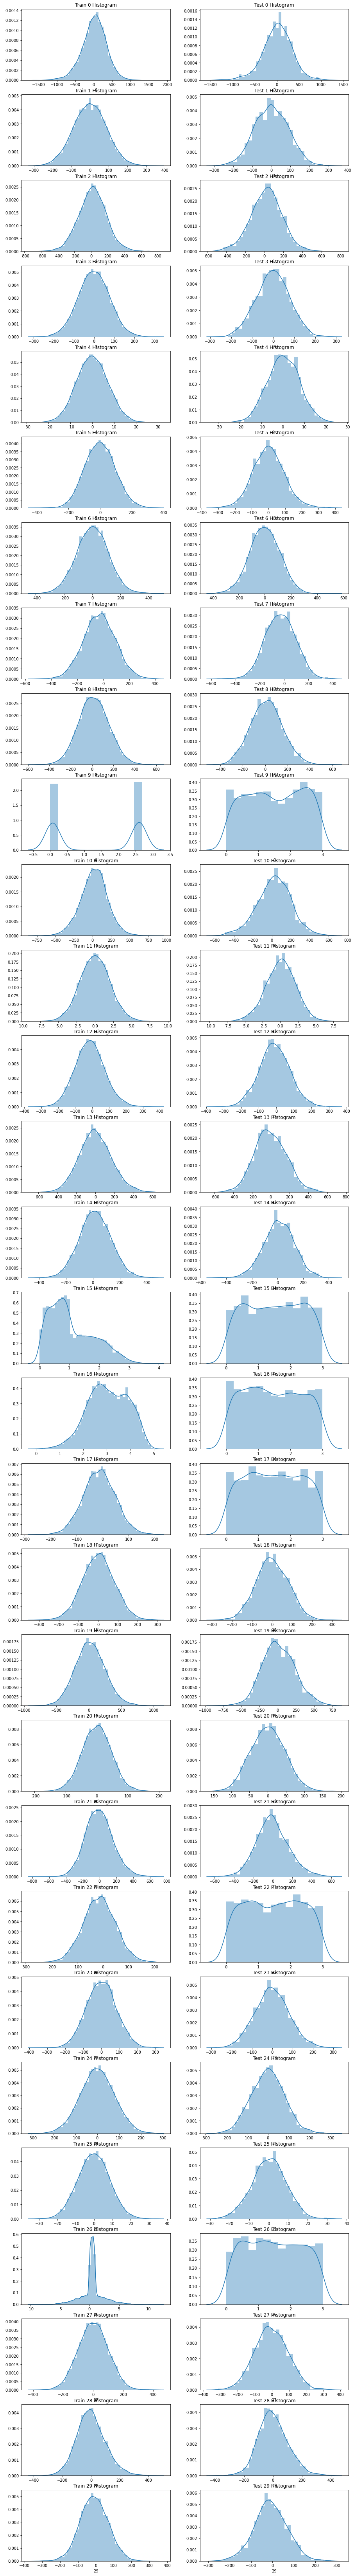

In [10]:
fig,axes = plt.subplots(30,2,figsize=[15,120])
for x in range(0,30):
    a=0
    sns.distplot(train[x], ax = axes[x,a])
    axes[x,a].set_title(f'Train {x} Histogram')
    a=1
    sns.distplot(test[x], ax = axes[x,a])
    axes[x,a].set_title(f'Test {x} Histogram')

## Logistic Regression

In [5]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,GradientBoostingClassifier, \
AdaBoostClassifier, VotingClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.base import BaseEstimator, ClassifierMixin
import lightgbm as lgb
import xgboost as xgb

from catboost import CatBoostClassifier
from sklearn.svm import SVC

class ft:
    
    def __init__(self, train, target, test, model, dropped_columns = [1, 9, 15, 16, 17, 22, 25, 26], cross_validation=False):
        
        self.train = train
        self.test = test
        self.target = target
        self.model = model
        self.dropped_columns = dropped_columns
        self.X_test = np.array([])
        self.X_train = np.array([])
        self.y_test = np.array([])
        self.y_train = np.array([])
        self.y_pred = np.array([])
        self.y_pred_proba = np.array([])
        self.fitted = False
        self.cross_validation = cross_validation
            
    def check_fitting(self):
        
        if self.fitted == False:
            self.model = ft.fit(self)
            
    def result(y):
        
        final_result = result = 100 if y > 0.82 else (40 + (y - 0.6) / 0.22 * 60 if y > 0.6 else 0)
        return final_result
    
    def preprocess(self):
        
        
        X = self.train.drop(columns = self.dropped_columns)
        X = StandardScaler().fit_transform(X)
#         X = MinMaxScaler().fit_transform(X)
        
        y = self.target['target'].values
        
        return X, y
    
    def split(self, X, y):
        
        return train_test_split(X, y, test_size=0.25,random_state=42) # splitting
    
    def fit(self):
        
        X, y = ft.preprocess(self)
        
        if self.cross_validation == True:
            print(f'cross validation score is: {cross_val_score(self.model, X, y, scoring = "roc_auc").mean()}')
        else:

            from sklearn.model_selection import ShuffleSplit
            from sklearn.model_selection import KFold
#             kf = KFold(n_splits=10, random_state=42)
            kf = ShuffleSplit(n_splits=10, test_size=0.25, random_state=42)
            a = np.array([])  
            i = 1

            for train_index, test_index in kf.split(X):

                  train_values_x = X[train_index] #значение x в тренировочной выборке
                  train_values_y = y[train_index] #значение функции в тренировочной выборке
                  test_values_x = X[test_index] #значение x тестовая выборке 
                  test_values_y = y[test_index] #значение функции в тестовой выборке

                  self.model.fit(train_values_x,train_values_y)
                  test_predict = self.model.predict_proba(test_values_x)[:,1]
                  result = roc_auc_score(test_values_y, test_predict)
                  print(f'roc-auc: {result:.3f} iteration {1}')
                  a = np.append(a,result)
                  i +=1
                  
                  
        self.X_train, self.X_test, self.y_train, self.y_test = ft.split(self,X,y)

        self.model.fit(self.X_train, self.y_train) # обучили модель  
                  
        self.fitted = True
        print(a.mean())
            
        self.y_pred = self.model.predict(self.X_test)
        self.y_pred_proba = self.model.predict_proba(self.X_test)[:,1]
        print(f'roc-auc: {roc_auc_score(self.y_test, self.y_pred_proba):.3f}')
        
        return self.model
    
    def roc_auc_plot(self):
        
        ft.check_fitting(self)
        roc_result = roc_auc_score(self.y_test, self.y_pred_proba)
        
        plt.figure(figsize=(7, 7))
        fpr, tpr, thresholds = roc_curve(self.y_test, self.y_pred_proba)
        plt.plot(fpr, tpr, 'b', linewidth=3)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot([0, 0], [0, 1], 'k')
        plt.plot([1, 1], [0, 1], 'k')
        plt.plot([0, 1], [0, 0], 'k')
        plt.plot([0, 1], [1, 1], 'k')
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.xlim((0, 1))
        plt.ylim((0, 1))
        plt.axis('equal')
        plt.title(f'ROC-AUC: {roc_result:.3f}')
        plt.show()

        print(f' Баллы: {ft.result(roc_result)}')
        
    def classification_report(self):
                  
        ft.check_fitting(self)
        print(classification_report(self.model.predict(self.X_test), self.y_test))
        
    def confusion_matrix(self):
                  
        ft.check_fitting(self)
        sns.set_context('talk')
        cm = confusion_matrix(self.y_test, self.y_pred)
        ax = sns.heatmap(cm, annot=True, fmt='d')
    
    def predict(self):
                  
        ft.check_fitting(self)

        X = self.test.drop(columns = self.dropped_columns)
        X = StandardScaler().fit_transform(X)
#         X = MinMaxScaler().fit_transform(X)

        prediction = self.model.predict_proba(X)[:,1]
                  
        return prediction
    
    def submit(self,name_file = 'submission_file.csv'):
                  
        prediction = ft.predict(self)
        submission = pd.DataFrame(columns = ['0'], data = prediction)
        submission.to_csv(name_file, index = False,header=0)
                  
        print('done')

In [6]:
models = { 
    "LOG" : LogisticRegression(),
    
    "RF" : RandomForestClassifier(n_estimators=400,
                                  oob_score = True,random_state=42),
    
    "GBC" : GradientBoostingClassifier(n_estimators=100, 
                                     subsample=0.5,
                                     max_features=4,
                                     random_state=42),
    
    "EF" : ExtraTreesClassifier(n_estimators = 400,
                                max_features = 10,random_state=42),
    
    "GV_ABC": GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_features=10)),
                      param_grid={'n_estimators': [100, 150, 200], 'learning_rate': [0.01, 0.001]}, 
                      scoring='accuracy',
                      n_jobs=-1),
    
    "xgb": xgb.XGBClassifier(max_depth=400, 
                             learning_rate=0.1, 
                             n_estimators=400, 
                             silent=True, 
                             objective='binary:logistic', 
                             booster='gbtree',random_state=42),
    
    "lgb": lgb.LGBMClassifier(num_leaves=400, 
                              learning_rate=0.01, 
                              n_estimators=int(400),
                              colsample_bytree=0.5,
                              subsample=0.5, 
                              nthread=-1,
                              random_state=42),
    
    "catboost": CatBoostClassifier(random_state=42),
    
    "svm": SVC(gamma='auto',probability=True),
    
    "multi-layer": MLPClassifier(random_state=1, solver = 'adam', hidden_layer_sizes=(100,100,100),activation='logistic',max_iter = 1000),
    
    "neighbours": KNeighborsClassifier(2),
    
    "gaussian":  GaussianProcessClassifier(1.0 * RBF(1.0)),
    
    "adaboost":  AdaBoostClassifier(base_estimator=ExtraTreesClassifier(n_estimators = 400,
                                max_features = 10,random_state=42), n_estimators=400, random_state=0),
    
    "gass-nb": GaussianNB(),
    
    "quadra": QuadraticDiscriminantAnalysis(),

    "grid_search": GridSearchCV(LogisticRegression(), {'C':[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]}, cv = 5)
    
    
    
    
                       
}

vote = {
    "VC" : VotingClassifier([('CatB', models["catboost"]), 
                             ('ef', models["EF"])],
                            voting='soft'),
    "VC2": VotingClassifier([('CatB', models["EF"]), 
                             ('ef', ExtraTreesClassifier(n_estimators = 800,
                                max_features = 10,random_state=42)), ('ef2', models["adaboost"])],
                            
                            voting='soft')
}

roc-auc: 0.831 iteration 1
roc-auc: 0.832 iteration 1
roc-auc: 0.817 iteration 1
roc-auc: 0.836 iteration 1
roc-auc: 0.834 iteration 1
roc-auc: 0.836 iteration 1
roc-auc: 0.824 iteration 1
roc-auc: 0.821 iteration 1
roc-auc: 0.840 iteration 1
roc-auc: 0.830 iteration 1
0.8301362223100792
roc-auc: 0.831


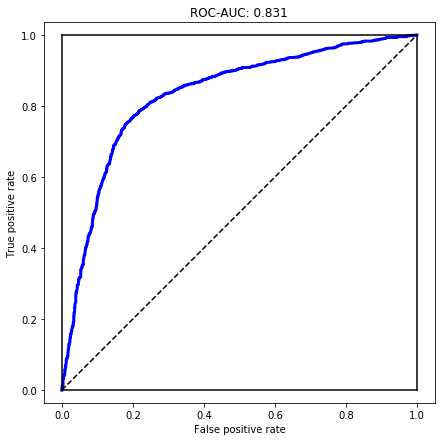

 Баллы: 100


In [11]:

cor_columns = [0, 2, 7, 9, 11, 19, 22]
drop_my = [9, 15, 16, 17, 22, 26]


log_reg = ft(train, target, test, vote["VC2"], dropped_columns = drop_my, cross_validation=False)
log_reg.roc_auc_plot()

Learning rate set to 0.029632
0:	learn: 0.6891956	total: 103ms	remaining: 1m 42s
1:	learn: 0.6864643	total: 200ms	remaining: 1m 39s
2:	learn: 0.6825410	total: 307ms	remaining: 1m 41s
3:	learn: 0.6789378	total: 401ms	remaining: 1m 39s
4:	learn: 0.6762887	total: 513ms	remaining: 1m 42s
5:	learn: 0.6730134	total: 604ms	remaining: 1m 40s
6:	learn: 0.6706185	total: 711ms	remaining: 1m 40s
7:	learn: 0.6676379	total: 804ms	remaining: 1m 39s
8:	learn: 0.6646270	total: 1.01s	remaining: 1m 51s
9:	learn: 0.6618479	total: 1.16s	remaining: 1m 54s
10:	learn: 0.6596042	total: 1.3s	remaining: 1m 57s
11:	learn: 0.6578048	total: 1.41s	remaining: 1m 56s
12:	learn: 0.6551277	total: 1.55s	remaining: 1m 57s
13:	learn: 0.6530511	total: 1.7s	remaining: 1m 59s
14:	learn: 0.6501003	total: 1.83s	remaining: 2m
15:	learn: 0.6478640	total: 1.95s	remaining: 2m
16:	learn: 0.6459943	total: 2.08s	remaining: 2m
17:	learn: 0.6431879	total: 2.19s	remaining: 1m 59s
18:	learn: 0.6408603	total: 2.31s	remaining: 1m 59s
19:	le

158:	learn: 0.5240856	total: 16.8s	remaining: 1m 28s
159:	learn: 0.5237211	total: 16.9s	remaining: 1m 28s
160:	learn: 0.5236155	total: 17s	remaining: 1m 28s
161:	learn: 0.5230376	total: 17.1s	remaining: 1m 28s
162:	learn: 0.5227945	total: 17.2s	remaining: 1m 28s
163:	learn: 0.5225806	total: 17.3s	remaining: 1m 28s
164:	learn: 0.5218747	total: 17.4s	remaining: 1m 27s
165:	learn: 0.5216195	total: 17.5s	remaining: 1m 27s
166:	learn: 0.5210529	total: 17.6s	remaining: 1m 27s
167:	learn: 0.5208682	total: 17.7s	remaining: 1m 27s
168:	learn: 0.5204708	total: 17.8s	remaining: 1m 27s
169:	learn: 0.5203294	total: 17.9s	remaining: 1m 27s
170:	learn: 0.5198278	total: 18s	remaining: 1m 27s
171:	learn: 0.5195256	total: 18.1s	remaining: 1m 26s
172:	learn: 0.5190121	total: 18.2s	remaining: 1m 26s
173:	learn: 0.5184170	total: 18.3s	remaining: 1m 26s
174:	learn: 0.5180087	total: 18.4s	remaining: 1m 26s
175:	learn: 0.5175185	total: 18.5s	remaining: 1m 26s
176:	learn: 0.5173535	total: 18.6s	remaining: 1m 2

314:	learn: 0.4820774	total: 32.1s	remaining: 1m 9s
315:	learn: 0.4820318	total: 32.2s	remaining: 1m 9s
316:	learn: 0.4818787	total: 32.3s	remaining: 1m 9s
317:	learn: 0.4817187	total: 32.4s	remaining: 1m 9s
318:	learn: 0.4814759	total: 32.5s	remaining: 1m 9s
319:	learn: 0.4814130	total: 32.6s	remaining: 1m 9s
320:	learn: 0.4809053	total: 32.7s	remaining: 1m 9s
321:	learn: 0.4801918	total: 32.8s	remaining: 1m 9s
322:	learn: 0.4801054	total: 32.9s	remaining: 1m 9s
323:	learn: 0.4799511	total: 33s	remaining: 1m 8s
324:	learn: 0.4797108	total: 33.1s	remaining: 1m 8s
325:	learn: 0.4797078	total: 33.2s	remaining: 1m 8s
326:	learn: 0.4795710	total: 33.3s	remaining: 1m 8s
327:	learn: 0.4788915	total: 33.4s	remaining: 1m 8s
328:	learn: 0.4787722	total: 33.5s	remaining: 1m 8s
329:	learn: 0.4786689	total: 33.6s	remaining: 1m 8s
330:	learn: 0.4783955	total: 33.7s	remaining: 1m 8s
331:	learn: 0.4783009	total: 33.8s	remaining: 1m 7s
332:	learn: 0.4782276	total: 33.9s	remaining: 1m 7s
333:	learn: 0.

475:	learn: 0.4492520	total: 48.8s	remaining: 53.7s
476:	learn: 0.4491649	total: 48.9s	remaining: 53.6s
477:	learn: 0.4490027	total: 49s	remaining: 53.5s
478:	learn: 0.4487682	total: 49.1s	remaining: 53.4s
479:	learn: 0.4486996	total: 49.2s	remaining: 53.3s
480:	learn: 0.4486123	total: 49.3s	remaining: 53.2s
481:	learn: 0.4485195	total: 49.4s	remaining: 53.1s
482:	learn: 0.4484059	total: 49.5s	remaining: 53s
483:	learn: 0.4483091	total: 49.6s	remaining: 52.9s
484:	learn: 0.4482349	total: 49.7s	remaining: 52.8s
485:	learn: 0.4480812	total: 49.8s	remaining: 52.7s
486:	learn: 0.4479360	total: 49.9s	remaining: 52.6s
487:	learn: 0.4476208	total: 50s	remaining: 52.5s
488:	learn: 0.4474766	total: 50.1s	remaining: 52.4s
489:	learn: 0.4473995	total: 50.2s	remaining: 52.3s
490:	learn: 0.4473382	total: 50.3s	remaining: 52.1s
491:	learn: 0.4469846	total: 50.4s	remaining: 52.1s
492:	learn: 0.4468642	total: 50.5s	remaining: 52s
493:	learn: 0.4467003	total: 50.6s	remaining: 51.9s
494:	learn: 0.446606

636:	learn: 0.4266439	total: 1m 5s	remaining: 37.5s
637:	learn: 0.4264833	total: 1m 5s	remaining: 37.4s
638:	learn: 0.4263104	total: 1m 6s	remaining: 37.3s
639:	learn: 0.4262109	total: 1m 6s	remaining: 37.2s
640:	learn: 0.4261267	total: 1m 6s	remaining: 37.1s
641:	learn: 0.4260233	total: 1m 6s	remaining: 37s
642:	learn: 0.4258440	total: 1m 6s	remaining: 36.9s
643:	learn: 0.4256222	total: 1m 6s	remaining: 36.8s
644:	learn: 0.4254324	total: 1m 6s	remaining: 36.7s
645:	learn: 0.4253317	total: 1m 6s	remaining: 36.6s
646:	learn: 0.4252580	total: 1m 6s	remaining: 36.5s
647:	learn: 0.4251660	total: 1m 7s	remaining: 36.4s
648:	learn: 0.4249593	total: 1m 7s	remaining: 36.3s
649:	learn: 0.4248425	total: 1m 7s	remaining: 36.2s
650:	learn: 0.4247037	total: 1m 7s	remaining: 36.1s
651:	learn: 0.4245409	total: 1m 7s	remaining: 36s
652:	learn: 0.4245409	total: 1m 7s	remaining: 35.8s
653:	learn: 0.4244676	total: 1m 7s	remaining: 35.7s
654:	learn: 0.4243784	total: 1m 7s	remaining: 35.6s
655:	learn: 0.42

792:	learn: 0.4068686	total: 1m 22s	remaining: 21.5s
793:	learn: 0.4066936	total: 1m 22s	remaining: 21.4s
794:	learn: 0.4064818	total: 1m 22s	remaining: 21.2s
795:	learn: 0.4063889	total: 1m 22s	remaining: 21.1s
796:	learn: 0.4063377	total: 1m 22s	remaining: 21s
797:	learn: 0.4061880	total: 1m 22s	remaining: 20.9s
798:	learn: 0.4061302	total: 1m 22s	remaining: 20.8s
799:	learn: 0.4061070	total: 1m 22s	remaining: 20.7s
800:	learn: 0.4060136	total: 1m 23s	remaining: 20.6s
801:	learn: 0.4060093	total: 1m 23s	remaining: 20.5s
802:	learn: 0.4059640	total: 1m 23s	remaining: 20.4s
803:	learn: 0.4057761	total: 1m 23s	remaining: 20.3s
804:	learn: 0.4057168	total: 1m 23s	remaining: 20.2s
805:	learn: 0.4055825	total: 1m 23s	remaining: 20.1s
806:	learn: 0.4054415	total: 1m 23s	remaining: 20s
807:	learn: 0.4053149	total: 1m 23s	remaining: 19.9s
808:	learn: 0.4052345	total: 1m 23s	remaining: 19.8s
809:	learn: 0.4051774	total: 1m 23s	remaining: 19.7s
810:	learn: 0.4051116	total: 1m 23s	remaining: 19.

950:	learn: 0.3904897	total: 1m 38s	remaining: 5.05s
951:	learn: 0.3903808	total: 1m 38s	remaining: 4.95s
952:	learn: 0.3903167	total: 1m 38s	remaining: 4.84s
953:	learn: 0.3902570	total: 1m 38s	remaining: 4.74s
954:	learn: 0.3902049	total: 1m 38s	remaining: 4.64s
955:	learn: 0.3900480	total: 1m 38s	remaining: 4.54s
956:	learn: 0.3899964	total: 1m 38s	remaining: 4.43s
957:	learn: 0.3899818	total: 1m 38s	remaining: 4.33s
958:	learn: 0.3898965	total: 1m 38s	remaining: 4.23s
959:	learn: 0.3898417	total: 1m 38s	remaining: 4.12s
960:	learn: 0.3898000	total: 1m 39s	remaining: 4.02s
961:	learn: 0.3897789	total: 1m 39s	remaining: 3.92s
962:	learn: 0.3896939	total: 1m 39s	remaining: 3.81s
963:	learn: 0.3896220	total: 1m 39s	remaining: 3.71s
964:	learn: 0.3894978	total: 1m 39s	remaining: 3.61s
965:	learn: 0.3894054	total: 1m 39s	remaining: 3.5s
966:	learn: 0.3892856	total: 1m 39s	remaining: 3.4s
967:	learn: 0.3891821	total: 1m 39s	remaining: 3.3s
968:	learn: 0.3889877	total: 1m 39s	remaining: 3.

106:	learn: 0.5475823	total: 11.5s	remaining: 1m 35s
107:	learn: 0.5470727	total: 11.6s	remaining: 1m 35s
108:	learn: 0.5462348	total: 11.7s	remaining: 1m 35s
109:	learn: 0.5458786	total: 11.8s	remaining: 1m 35s
110:	learn: 0.5457118	total: 11.9s	remaining: 1m 35s
111:	learn: 0.5452448	total: 12s	remaining: 1m 35s
112:	learn: 0.5446818	total: 12.1s	remaining: 1m 34s
113:	learn: 0.5443513	total: 12.2s	remaining: 1m 34s
114:	learn: 0.5436676	total: 12.3s	remaining: 1m 34s
115:	learn: 0.5435056	total: 12.4s	remaining: 1m 34s
116:	learn: 0.5430953	total: 12.5s	remaining: 1m 34s
117:	learn: 0.5426442	total: 12.6s	remaining: 1m 34s
118:	learn: 0.5419904	total: 12.7s	remaining: 1m 34s
119:	learn: 0.5416780	total: 12.8s	remaining: 1m 33s
120:	learn: 0.5410191	total: 12.9s	remaining: 1m 33s
121:	learn: 0.5406588	total: 13s	remaining: 1m 33s
122:	learn: 0.5400927	total: 13.1s	remaining: 1m 33s
123:	learn: 0.5393195	total: 13.2s	remaining: 1m 33s
124:	learn: 0.5390175	total: 13.3s	remaining: 1m 3

262:	learn: 0.4943349	total: 27.8s	remaining: 1m 18s
263:	learn: 0.4941338	total: 27.9s	remaining: 1m 17s
264:	learn: 0.4939562	total: 28.1s	remaining: 1m 17s
265:	learn: 0.4937073	total: 28.2s	remaining: 1m 17s
266:	learn: 0.4935435	total: 28.3s	remaining: 1m 17s
267:	learn: 0.4932328	total: 28.4s	remaining: 1m 17s
268:	learn: 0.4928872	total: 28.5s	remaining: 1m 17s
269:	learn: 0.4925643	total: 28.6s	remaining: 1m 17s
270:	learn: 0.4924670	total: 28.7s	remaining: 1m 17s
271:	learn: 0.4920155	total: 28.8s	remaining: 1m 17s
272:	learn: 0.4914689	total: 28.9s	remaining: 1m 16s
273:	learn: 0.4914489	total: 28.9s	remaining: 1m 16s
274:	learn: 0.4912599	total: 29s	remaining: 1m 16s
275:	learn: 0.4907983	total: 29.2s	remaining: 1m 16s
276:	learn: 0.4905856	total: 29.3s	remaining: 1m 16s
277:	learn: 0.4904080	total: 29.4s	remaining: 1m 16s
278:	learn: 0.4901871	total: 29.5s	remaining: 1m 16s
279:	learn: 0.4901213	total: 29.6s	remaining: 1m 16s
280:	learn: 0.4898364	total: 29.7s	remaining: 1m

421:	learn: 0.4597632	total: 44.1s	remaining: 1m
422:	learn: 0.4595861	total: 44.2s	remaining: 1m
423:	learn: 0.4594431	total: 44.3s	remaining: 1m
424:	learn: 0.4591684	total: 44.4s	remaining: 1m
425:	learn: 0.4589611	total: 44.5s	remaining: 59.9s
426:	learn: 0.4584158	total: 44.6s	remaining: 59.8s
427:	learn: 0.4583254	total: 44.7s	remaining: 59.7s
428:	learn: 0.4582785	total: 44.8s	remaining: 59.6s
429:	learn: 0.4581780	total: 44.9s	remaining: 59.5s
430:	learn: 0.4581126	total: 45s	remaining: 59.4s
431:	learn: 0.4580367	total: 45.1s	remaining: 59.3s
432:	learn: 0.4579811	total: 45.2s	remaining: 59.2s
433:	learn: 0.4577731	total: 45.3s	remaining: 59.1s
434:	learn: 0.4575649	total: 45.4s	remaining: 59s
435:	learn: 0.4574104	total: 45.5s	remaining: 58.8s
436:	learn: 0.4573246	total: 45.6s	remaining: 58.7s
437:	learn: 0.4569412	total: 45.7s	remaining: 58.6s
438:	learn: 0.4568187	total: 45.8s	remaining: 58.5s
439:	learn: 0.4566019	total: 45.9s	remaining: 58.4s
440:	learn: 0.4563947	total:

581:	learn: 0.4334407	total: 1m	remaining: 43.5s
582:	learn: 0.4333422	total: 1m	remaining: 43.4s
583:	learn: 0.4332162	total: 1m	remaining: 43.3s
584:	learn: 0.4331242	total: 1m	remaining: 43.2s
585:	learn: 0.4330632	total: 1m 1s	remaining: 43.1s
586:	learn: 0.4329442	total: 1m 1s	remaining: 43s
587:	learn: 0.4328926	total: 1m 1s	remaining: 42.9s
588:	learn: 0.4327951	total: 1m 1s	remaining: 42.8s
589:	learn: 0.4325528	total: 1m 1s	remaining: 42.7s
590:	learn: 0.4325067	total: 1m 1s	remaining: 42.6s
591:	learn: 0.4324368	total: 1m 1s	remaining: 42.5s
592:	learn: 0.4322395	total: 1m 1s	remaining: 42.4s
593:	learn: 0.4321431	total: 1m 1s	remaining: 42.3s
594:	learn: 0.4320469	total: 1m 2s	remaining: 42.2s
595:	learn: 0.4318989	total: 1m 2s	remaining: 42.1s
596:	learn: 0.4316685	total: 1m 2s	remaining: 42s
597:	learn: 0.4316683	total: 1m 2s	remaining: 41.9s
598:	learn: 0.4315750	total: 1m 2s	remaining: 41.8s
599:	learn: 0.4314104	total: 1m 2s	remaining: 41.7s
600:	learn: 0.4313137	total:

739:	learn: 0.4153014	total: 1m 16s	remaining: 27s
740:	learn: 0.4150780	total: 1m 16s	remaining: 26.9s
741:	learn: 0.4150459	total: 1m 17s	remaining: 26.8s
742:	learn: 0.4149837	total: 1m 17s	remaining: 26.7s
743:	learn: 0.4148534	total: 1m 17s	remaining: 26.6s
744:	learn: 0.4147360	total: 1m 17s	remaining: 26.5s
745:	learn: 0.4145729	total: 1m 17s	remaining: 26.4s
746:	learn: 0.4144247	total: 1m 17s	remaining: 26.3s
747:	learn: 0.4143713	total: 1m 17s	remaining: 26.2s
748:	learn: 0.4143165	total: 1m 17s	remaining: 26.1s
749:	learn: 0.4141114	total: 1m 17s	remaining: 26s
750:	learn: 0.4140504	total: 1m 17s	remaining: 25.8s
751:	learn: 0.4140332	total: 1m 18s	remaining: 25.7s
752:	learn: 0.4137738	total: 1m 18s	remaining: 25.6s
753:	learn: 0.4136365	total: 1m 18s	remaining: 25.5s
754:	learn: 0.4135589	total: 1m 18s	remaining: 25.4s
755:	learn: 0.4135246	total: 1m 18s	remaining: 25.3s
756:	learn: 0.4134644	total: 1m 18s	remaining: 25.2s
757:	learn: 0.4134050	total: 1m 18s	remaining: 25.

896:	learn: 0.3981714	total: 1m 32s	remaining: 10.6s
897:	learn: 0.3980674	total: 1m 32s	remaining: 10.5s
898:	learn: 0.3978620	total: 1m 32s	remaining: 10.4s
899:	learn: 0.3978314	total: 1m 32s	remaining: 10.3s
900:	learn: 0.3976596	total: 1m 33s	remaining: 10.2s
901:	learn: 0.3975602	total: 1m 33s	remaining: 10.1s
902:	learn: 0.3974535	total: 1m 33s	remaining: 10s
903:	learn: 0.3973312	total: 1m 33s	remaining: 9.92s
904:	learn: 0.3972625	total: 1m 33s	remaining: 9.81s
905:	learn: 0.3971745	total: 1m 33s	remaining: 9.71s
906:	learn: 0.3971742	total: 1m 33s	remaining: 9.6s
907:	learn: 0.3970996	total: 1m 33s	remaining: 9.5s
908:	learn: 0.3970495	total: 1m 33s	remaining: 9.39s
909:	learn: 0.3969897	total: 1m 33s	remaining: 9.29s
910:	learn: 0.3969039	total: 1m 34s	remaining: 9.19s
911:	learn: 0.3967199	total: 1m 34s	remaining: 9.08s
912:	learn: 0.3966318	total: 1m 34s	remaining: 8.98s
913:	learn: 0.3965118	total: 1m 34s	remaining: 8.88s
914:	learn: 0.3964612	total: 1m 34s	remaining: 8.7

54:	learn: 0.5837338	total: 5.89s	remaining: 1m 41s
55:	learn: 0.5829149	total: 5.99s	remaining: 1m 40s
56:	learn: 0.5819663	total: 6.09s	remaining: 1m 40s
57:	learn: 0.5807018	total: 6.2s	remaining: 1m 40s
58:	learn: 0.5800793	total: 6.29s	remaining: 1m 40s
59:	learn: 0.5792485	total: 6.39s	remaining: 1m 40s
60:	learn: 0.5782415	total: 6.5s	remaining: 1m 40s
61:	learn: 0.5778200	total: 6.59s	remaining: 1m 39s
62:	learn: 0.5765322	total: 6.71s	remaining: 1m 39s
63:	learn: 0.5759396	total: 6.82s	remaining: 1m 39s
64:	learn: 0.5742881	total: 6.93s	remaining: 1m 39s
65:	learn: 0.5737224	total: 7.04s	remaining: 1m 39s
66:	learn: 0.5728546	total: 7.14s	remaining: 1m 39s
67:	learn: 0.5716039	total: 7.24s	remaining: 1m 39s
68:	learn: 0.5707194	total: 7.35s	remaining: 1m 39s
69:	learn: 0.5698717	total: 7.45s	remaining: 1m 38s
70:	learn: 0.5690345	total: 7.55s	remaining: 1m 38s
71:	learn: 0.5682853	total: 7.66s	remaining: 1m 38s
72:	learn: 0.5672614	total: 7.76s	remaining: 1m 38s
73:	learn: 0.5

211:	learn: 0.4980208	total: 22.8s	remaining: 1m 24s
212:	learn: 0.4978256	total: 22.9s	remaining: 1m 24s
213:	learn: 0.4976395	total: 23s	remaining: 1m 24s
214:	learn: 0.4975057	total: 23.1s	remaining: 1m 24s
215:	learn: 0.4973287	total: 23.2s	remaining: 1m 24s
216:	learn: 0.4973097	total: 23.3s	remaining: 1m 23s
217:	learn: 0.4968605	total: 23.4s	remaining: 1m 23s
218:	learn: 0.4964622	total: 23.5s	remaining: 1m 23s
219:	learn: 0.4963089	total: 23.6s	remaining: 1m 23s
220:	learn: 0.4960932	total: 23.7s	remaining: 1m 23s
221:	learn: 0.4959445	total: 23.8s	remaining: 1m 23s
222:	learn: 0.4957908	total: 23.9s	remaining: 1m 23s
223:	learn: 0.4956611	total: 24s	remaining: 1m 23s
224:	learn: 0.4955210	total: 24.1s	remaining: 1m 22s
225:	learn: 0.4951954	total: 24.2s	remaining: 1m 22s
226:	learn: 0.4947708	total: 24.3s	remaining: 1m 22s
227:	learn: 0.4942994	total: 24.4s	remaining: 1m 22s
228:	learn: 0.4939811	total: 24.5s	remaining: 1m 22s
229:	learn: 0.4937677	total: 24.6s	remaining: 1m 2

368:	learn: 0.4623469	total: 38.8s	remaining: 1m 6s
369:	learn: 0.4622110	total: 38.9s	remaining: 1m 6s
370:	learn: 0.4620229	total: 39s	remaining: 1m 6s
371:	learn: 0.4619089	total: 39.1s	remaining: 1m 6s
372:	learn: 0.4617974	total: 39.2s	remaining: 1m 5s
373:	learn: 0.4616333	total: 39.3s	remaining: 1m 5s
374:	learn: 0.4615301	total: 39.4s	remaining: 1m 5s
375:	learn: 0.4613996	total: 39.5s	remaining: 1m 5s
376:	learn: 0.4612211	total: 39.6s	remaining: 1m 5s
377:	learn: 0.4607418	total: 39.8s	remaining: 1m 5s
378:	learn: 0.4604852	total: 39.9s	remaining: 1m 5s
379:	learn: 0.4604383	total: 40s	remaining: 1m 5s
380:	learn: 0.4602820	total: 40.1s	remaining: 1m 5s
381:	learn: 0.4598900	total: 40.2s	remaining: 1m 4s
382:	learn: 0.4597036	total: 40.3s	remaining: 1m 4s
383:	learn: 0.4594846	total: 40.4s	remaining: 1m 4s
384:	learn: 0.4589902	total: 40.5s	remaining: 1m 4s
385:	learn: 0.4587625	total: 40.6s	remaining: 1m 4s
386:	learn: 0.4586600	total: 40.7s	remaining: 1m 4s
387:	learn: 0.45

528:	learn: 0.4323212	total: 56.2s	remaining: 50s
529:	learn: 0.4321920	total: 56.3s	remaining: 50s
530:	learn: 0.4319193	total: 56.5s	remaining: 49.9s
531:	learn: 0.4318222	total: 56.7s	remaining: 49.8s
532:	learn: 0.4316745	total: 56.8s	remaining: 49.7s
533:	learn: 0.4315300	total: 56.9s	remaining: 49.7s
534:	learn: 0.4311984	total: 57s	remaining: 49.6s
535:	learn: 0.4310471	total: 57.2s	remaining: 49.5s
536:	learn: 0.4309356	total: 57.3s	remaining: 49.4s
537:	learn: 0.4308096	total: 57.4s	remaining: 49.3s
538:	learn: 0.4307223	total: 57.6s	remaining: 49.2s
539:	learn: 0.4306087	total: 57.7s	remaining: 49.1s
540:	learn: 0.4304744	total: 57.8s	remaining: 49s
541:	learn: 0.4303279	total: 57.9s	remaining: 49s
542:	learn: 0.4301215	total: 58.1s	remaining: 48.9s
543:	learn: 0.4298702	total: 58.2s	remaining: 48.8s
544:	learn: 0.4297704	total: 58.3s	remaining: 48.7s
545:	learn: 0.4297051	total: 58.5s	remaining: 48.6s
546:	learn: 0.4294728	total: 58.6s	remaining: 48.5s
547:	learn: 0.4292801	

688:	learn: 0.4101942	total: 1m 15s	remaining: 33.9s
689:	learn: 0.4100515	total: 1m 15s	remaining: 33.8s
690:	learn: 0.4098995	total: 1m 15s	remaining: 33.7s
691:	learn: 0.4098259	total: 1m 15s	remaining: 33.6s
692:	learn: 0.4096823	total: 1m 15s	remaining: 33.4s
693:	learn: 0.4096422	total: 1m 15s	remaining: 33.3s
694:	learn: 0.4095296	total: 1m 15s	remaining: 33.2s
695:	learn: 0.4093708	total: 1m 15s	remaining: 33.1s
696:	learn: 0.4091282	total: 1m 15s	remaining: 33s
697:	learn: 0.4089909	total: 1m 16s	remaining: 32.9s
698:	learn: 0.4088692	total: 1m 16s	remaining: 32.8s
699:	learn: 0.4087860	total: 1m 16s	remaining: 32.7s
700:	learn: 0.4087248	total: 1m 16s	remaining: 32.6s
701:	learn: 0.4086170	total: 1m 16s	remaining: 32.5s
702:	learn: 0.4085300	total: 1m 16s	remaining: 32.3s
703:	learn: 0.4083660	total: 1m 16s	remaining: 32.2s
704:	learn: 0.4081650	total: 1m 16s	remaining: 32.1s
705:	learn: 0.4081256	total: 1m 16s	remaining: 32s
706:	learn: 0.4080608	total: 1m 16s	remaining: 31.

844:	learn: 0.3929706	total: 1m 36s	remaining: 17.8s
845:	learn: 0.3928755	total: 1m 37s	remaining: 17.7s
846:	learn: 0.3927721	total: 1m 37s	remaining: 17.6s
847:	learn: 0.3926721	total: 1m 37s	remaining: 17.4s
848:	learn: 0.3924260	total: 1m 37s	remaining: 17.3s
849:	learn: 0.3924053	total: 1m 37s	remaining: 17.2s
850:	learn: 0.3923622	total: 1m 37s	remaining: 17.1s
851:	learn: 0.3923449	total: 1m 37s	remaining: 17s
852:	learn: 0.3922342	total: 1m 38s	remaining: 16.9s
853:	learn: 0.3921972	total: 1m 38s	remaining: 16.8s
854:	learn: 0.3920117	total: 1m 38s	remaining: 16.7s
855:	learn: 0.3918536	total: 1m 38s	remaining: 16.6s
856:	learn: 0.3917539	total: 1m 38s	remaining: 16.5s
857:	learn: 0.3916902	total: 1m 39s	remaining: 16.4s
858:	learn: 0.3915675	total: 1m 39s	remaining: 16.3s
859:	learn: 0.3914695	total: 1m 39s	remaining: 16.2s
860:	learn: 0.3912534	total: 1m 39s	remaining: 16.1s
861:	learn: 0.3912259	total: 1m 39s	remaining: 16s
862:	learn: 0.3911500	total: 1m 40s	remaining: 15.

roc-auc: 0.814 iteration 1
Learning rate set to 0.029632
0:	learn: 0.6890630	total: 140ms	remaining: 2m 19s
1:	learn: 0.6848555	total: 239ms	remaining: 1m 59s
2:	learn: 0.6809527	total: 362ms	remaining: 2m
3:	learn: 0.6771677	total: 481ms	remaining: 1m 59s
4:	learn: 0.6740869	total: 590ms	remaining: 1m 57s
5:	learn: 0.6712084	total: 696ms	remaining: 1m 55s
6:	learn: 0.6690083	total: 818ms	remaining: 1m 55s
7:	learn: 0.6667223	total: 935ms	remaining: 1m 55s
8:	learn: 0.6631376	total: 1.07s	remaining: 1m 58s
9:	learn: 0.6604917	total: 1.18s	remaining: 1m 56s
10:	learn: 0.6577397	total: 1.3s	remaining: 1m 56s
11:	learn: 0.6544938	total: 1.41s	remaining: 1m 55s
12:	learn: 0.6525052	total: 1.53s	remaining: 1m 56s
13:	learn: 0.6500725	total: 1.64s	remaining: 1m 55s
14:	learn: 0.6480616	total: 1.76s	remaining: 1m 55s
15:	learn: 0.6461053	total: 1.87s	remaining: 1m 55s
16:	learn: 0.6443248	total: 1.98s	remaining: 1m 54s
17:	learn: 0.6417342	total: 2.09s	remaining: 1m 54s
18:	learn: 0.6393136	t

157:	learn: 0.5230522	total: 18.7s	remaining: 1m 39s
158:	learn: 0.5225422	total: 18.8s	remaining: 1m 39s
159:	learn: 0.5220229	total: 18.9s	remaining: 1m 39s
160:	learn: 0.5216982	total: 19.1s	remaining: 1m 39s
161:	learn: 0.5210565	total: 19.2s	remaining: 1m 39s
162:	learn: 0.5206321	total: 19.3s	remaining: 1m 39s
163:	learn: 0.5199175	total: 19.4s	remaining: 1m 39s
164:	learn: 0.5195119	total: 19.5s	remaining: 1m 38s
165:	learn: 0.5192621	total: 19.7s	remaining: 1m 38s
166:	learn: 0.5189520	total: 19.8s	remaining: 1m 38s
167:	learn: 0.5183554	total: 19.9s	remaining: 1m 38s
168:	learn: 0.5181263	total: 20s	remaining: 1m 38s
169:	learn: 0.5178631	total: 20.1s	remaining: 1m 38s
170:	learn: 0.5175323	total: 20.2s	remaining: 1m 38s
171:	learn: 0.5173473	total: 20.4s	remaining: 1m 38s
172:	learn: 0.5164861	total: 20.5s	remaining: 1m 37s
173:	learn: 0.5161775	total: 20.6s	remaining: 1m 37s
174:	learn: 0.5155604	total: 20.7s	remaining: 1m 37s
175:	learn: 0.5152014	total: 20.9s	remaining: 1m

314:	learn: 0.4776404	total: 36.7s	remaining: 1m 19s
315:	learn: 0.4775089	total: 36.8s	remaining: 1m 19s
316:	learn: 0.4772948	total: 36.9s	remaining: 1m 19s
317:	learn: 0.4769069	total: 37s	remaining: 1m 19s
318:	learn: 0.4766908	total: 37.1s	remaining: 1m 19s
319:	learn: 0.4765188	total: 37.2s	remaining: 1m 19s
320:	learn: 0.4764573	total: 37.4s	remaining: 1m 19s
321:	learn: 0.4762136	total: 37.5s	remaining: 1m 18s
322:	learn: 0.4759973	total: 37.6s	remaining: 1m 18s
323:	learn: 0.4758664	total: 37.7s	remaining: 1m 18s
324:	learn: 0.4754268	total: 37.8s	remaining: 1m 18s
325:	learn: 0.4752809	total: 37.9s	remaining: 1m 18s
326:	learn: 0.4751610	total: 38s	remaining: 1m 18s
327:	learn: 0.4749792	total: 38.1s	remaining: 1m 18s
328:	learn: 0.4744708	total: 38.2s	remaining: 1m 17s
329:	learn: 0.4743190	total: 38.3s	remaining: 1m 17s
330:	learn: 0.4739030	total: 38.4s	remaining: 1m 17s
331:	learn: 0.4738055	total: 38.5s	remaining: 1m 17s
332:	learn: 0.4736820	total: 38.7s	remaining: 1m 1

472:	learn: 0.4482326	total: 55.9s	remaining: 1m 2s
473:	learn: 0.4480625	total: 56s	remaining: 1m 2s
474:	learn: 0.4478726	total: 56.1s	remaining: 1m 2s
475:	learn: 0.4477376	total: 56.2s	remaining: 1m 1s
476:	learn: 0.4476510	total: 56.4s	remaining: 1m 1s
477:	learn: 0.4474565	total: 56.5s	remaining: 1m 1s
478:	learn: 0.4474052	total: 56.6s	remaining: 1m 1s
479:	learn: 0.4471711	total: 56.8s	remaining: 1m 1s
480:	learn: 0.4469960	total: 57s	remaining: 1m 1s
481:	learn: 0.4468001	total: 57.1s	remaining: 1m 1s
482:	learn: 0.4466918	total: 57.2s	remaining: 1m 1s
483:	learn: 0.4464281	total: 57.3s	remaining: 1m 1s
484:	learn: 0.4462915	total: 57.6s	remaining: 1m 1s
485:	learn: 0.4460761	total: 57.7s	remaining: 1m 1s
486:	learn: 0.4460759	total: 57.7s	remaining: 1m
487:	learn: 0.4459173	total: 57.9s	remaining: 1m
488:	learn: 0.4457285	total: 58s	remaining: 1m
489:	learn: 0.4454815	total: 58.1s	remaining: 1m
490:	learn: 0.4452814	total: 58.2s	remaining: 1m
491:	learn: 0.4450186	total: 58.3

632:	learn: 0.4246233	total: 1m 15s	remaining: 43.5s
633:	learn: 0.4245850	total: 1m 15s	remaining: 43.4s
634:	learn: 0.4244692	total: 1m 15s	remaining: 43.3s
635:	learn: 0.4243764	total: 1m 15s	remaining: 43.2s
636:	learn: 0.4242386	total: 1m 15s	remaining: 43.1s
637:	learn: 0.4241601	total: 1m 15s	remaining: 42.9s
638:	learn: 0.4241186	total: 1m 15s	remaining: 42.8s
639:	learn: 0.4240769	total: 1m 15s	remaining: 42.7s
640:	learn: 0.4240056	total: 1m 15s	remaining: 42.6s
641:	learn: 0.4240018	total: 1m 16s	remaining: 42.4s
642:	learn: 0.4238560	total: 1m 16s	remaining: 42.3s
643:	learn: 0.4236557	total: 1m 16s	remaining: 42.2s
644:	learn: 0.4234806	total: 1m 16s	remaining: 42s
645:	learn: 0.4232891	total: 1m 16s	remaining: 41.9s
646:	learn: 0.4231938	total: 1m 16s	remaining: 41.8s
647:	learn: 0.4231273	total: 1m 16s	remaining: 41.7s
648:	learn: 0.4229221	total: 1m 16s	remaining: 41.6s
649:	learn: 0.4228669	total: 1m 16s	remaining: 41.4s
650:	learn: 0.4227082	total: 1m 17s	remaining: 4

788:	learn: 0.4073108	total: 1m 32s	remaining: 24.8s
789:	learn: 0.4073089	total: 1m 32s	remaining: 24.6s
790:	learn: 0.4072585	total: 1m 32s	remaining: 24.5s
791:	learn: 0.4071093	total: 1m 32s	remaining: 24.4s
792:	learn: 0.4069667	total: 1m 32s	remaining: 24.3s
793:	learn: 0.4069468	total: 1m 33s	remaining: 24.1s
794:	learn: 0.4068414	total: 1m 33s	remaining: 24s
795:	learn: 0.4068174	total: 1m 33s	remaining: 23.9s
796:	learn: 0.4066415	total: 1m 33s	remaining: 23.8s
797:	learn: 0.4065142	total: 1m 33s	remaining: 23.7s
798:	learn: 0.4064485	total: 1m 33s	remaining: 23.6s
799:	learn: 0.4062476	total: 1m 33s	remaining: 23.5s
800:	learn: 0.4061629	total: 1m 34s	remaining: 23.4s
801:	learn: 0.4060715	total: 1m 34s	remaining: 23.3s
802:	learn: 0.4059254	total: 1m 34s	remaining: 23.2s
803:	learn: 0.4057393	total: 1m 34s	remaining: 23.1s
804:	learn: 0.4056109	total: 1m 34s	remaining: 22.9s
805:	learn: 0.4055401	total: 1m 34s	remaining: 22.8s
806:	learn: 0.4054243	total: 1m 34s	remaining: 2

946:	learn: 0.3914152	total: 1m 49s	remaining: 6.14s
947:	learn: 0.3912982	total: 1m 49s	remaining: 6.03s
948:	learn: 0.3910799	total: 1m 49s	remaining: 5.91s
949:	learn: 0.3909669	total: 1m 50s	remaining: 5.79s
950:	learn: 0.3909080	total: 1m 50s	remaining: 5.68s
951:	learn: 0.3907109	total: 1m 50s	remaining: 5.56s
952:	learn: 0.3906859	total: 1m 50s	remaining: 5.45s
953:	learn: 0.3905202	total: 1m 50s	remaining: 5.33s
954:	learn: 0.3904046	total: 1m 50s	remaining: 5.21s
955:	learn: 0.3901128	total: 1m 50s	remaining: 5.1s
956:	learn: 0.3899604	total: 1m 50s	remaining: 4.98s
957:	learn: 0.3898795	total: 1m 51s	remaining: 4.87s
958:	learn: 0.3897722	total: 1m 51s	remaining: 4.75s
959:	learn: 0.3897260	total: 1m 51s	remaining: 4.63s
960:	learn: 0.3897236	total: 1m 51s	remaining: 4.51s
961:	learn: 0.3896142	total: 1m 51s	remaining: 4.4s
962:	learn: 0.3895208	total: 1m 51s	remaining: 4.28s
963:	learn: 0.3893973	total: 1m 51s	remaining: 4.17s
964:	learn: 0.3893973	total: 1m 51s	remaining: 4

104:	learn: 0.5447911	total: 12.1s	remaining: 1m 42s
105:	learn: 0.5442539	total: 12.2s	remaining: 1m 42s
106:	learn: 0.5435592	total: 12.3s	remaining: 1m 42s
107:	learn: 0.5425753	total: 12.4s	remaining: 1m 42s
108:	learn: 0.5420540	total: 12.5s	remaining: 1m 42s
109:	learn: 0.5416218	total: 12.6s	remaining: 1m 42s
110:	learn: 0.5412655	total: 12.7s	remaining: 1m 42s
111:	learn: 0.5406951	total: 12.9s	remaining: 1m 41s
112:	learn: 0.5404603	total: 13s	remaining: 1m 41s
113:	learn: 0.5399153	total: 13.1s	remaining: 1m 41s
114:	learn: 0.5392472	total: 13.2s	remaining: 1m 41s
115:	learn: 0.5384856	total: 13.3s	remaining: 1m 41s
116:	learn: 0.5380444	total: 13.4s	remaining: 1m 41s
117:	learn: 0.5372761	total: 13.5s	remaining: 1m 41s
118:	learn: 0.5366034	total: 13.6s	remaining: 1m 41s
119:	learn: 0.5360182	total: 13.8s	remaining: 1m 40s
120:	learn: 0.5354040	total: 13.9s	remaining: 1m 40s
121:	learn: 0.5352236	total: 14s	remaining: 1m 40s
122:	learn: 0.5349067	total: 14.1s	remaining: 1m 4

260:	learn: 0.4895972	total: 30s	remaining: 1m 24s
261:	learn: 0.4894229	total: 30.1s	remaining: 1m 24s
262:	learn: 0.4890447	total: 30.2s	remaining: 1m 24s
263:	learn: 0.4887297	total: 30.3s	remaining: 1m 24s
264:	learn: 0.4885829	total: 30.4s	remaining: 1m 24s
265:	learn: 0.4884225	total: 30.5s	remaining: 1m 24s
266:	learn: 0.4880639	total: 30.7s	remaining: 1m 24s
267:	learn: 0.4879008	total: 30.8s	remaining: 1m 24s
268:	learn: 0.4876735	total: 30.9s	remaining: 1m 23s
269:	learn: 0.4875269	total: 31s	remaining: 1m 23s
270:	learn: 0.4873854	total: 31.1s	remaining: 1m 23s
271:	learn: 0.4872122	total: 31.2s	remaining: 1m 23s
272:	learn: 0.4871083	total: 31.3s	remaining: 1m 23s
273:	learn: 0.4867809	total: 31.4s	remaining: 1m 23s
274:	learn: 0.4866022	total: 31.5s	remaining: 1m 23s
275:	learn: 0.4864050	total: 31.6s	remaining: 1m 23s
276:	learn: 0.4860244	total: 31.8s	remaining: 1m 22s
277:	learn: 0.4858467	total: 31.9s	remaining: 1m 22s
278:	learn: 0.4854713	total: 32s	remaining: 1m 22s

416:	learn: 0.4537259	total: 47.5s	remaining: 1m 6s
417:	learn: 0.4535406	total: 47.6s	remaining: 1m 6s
418:	learn: 0.4533253	total: 47.7s	remaining: 1m 6s
419:	learn: 0.4530680	total: 47.8s	remaining: 1m 6s
420:	learn: 0.4530041	total: 47.9s	remaining: 1m 5s
421:	learn: 0.4528452	total: 48s	remaining: 1m 5s
422:	learn: 0.4525473	total: 48.1s	remaining: 1m 5s
423:	learn: 0.4521488	total: 48.2s	remaining: 1m 5s
424:	learn: 0.4520475	total: 48.4s	remaining: 1m 5s
425:	learn: 0.4518254	total: 48.5s	remaining: 1m 5s
426:	learn: 0.4516726	total: 48.6s	remaining: 1m 5s
427:	learn: 0.4514553	total: 48.7s	remaining: 1m 5s
428:	learn: 0.4510847	total: 48.8s	remaining: 1m 4s
429:	learn: 0.4508420	total: 48.9s	remaining: 1m 4s
430:	learn: 0.4506942	total: 49s	remaining: 1m 4s
431:	learn: 0.4502967	total: 49.1s	remaining: 1m 4s
432:	learn: 0.4499199	total: 49.3s	remaining: 1m 4s
433:	learn: 0.4497426	total: 49.4s	remaining: 1m 4s
434:	learn: 0.4494852	total: 49.5s	remaining: 1m 4s
435:	learn: 0.44

577:	learn: 0.4249217	total: 1m 5s	remaining: 47.7s
578:	learn: 0.4248155	total: 1m 5s	remaining: 47.6s
579:	learn: 0.4245762	total: 1m 5s	remaining: 47.5s
580:	learn: 0.4245755	total: 1m 5s	remaining: 47.3s
581:	learn: 0.4244271	total: 1m 5s	remaining: 47.2s
582:	learn: 0.4242295	total: 1m 5s	remaining: 47.1s
583:	learn: 0.4240324	total: 1m 5s	remaining: 47s
584:	learn: 0.4239266	total: 1m 6s	remaining: 46.9s
585:	learn: 0.4237841	total: 1m 6s	remaining: 46.7s
586:	learn: 0.4236788	total: 1m 6s	remaining: 46.6s
587:	learn: 0.4234124	total: 1m 6s	remaining: 46.5s
588:	learn: 0.4233469	total: 1m 6s	remaining: 46.4s
589:	learn: 0.4231760	total: 1m 6s	remaining: 46.3s
590:	learn: 0.4229839	total: 1m 6s	remaining: 46.2s
591:	learn: 0.4228287	total: 1m 6s	remaining: 46.1s
592:	learn: 0.4227931	total: 1m 6s	remaining: 45.9s
593:	learn: 0.4226010	total: 1m 7s	remaining: 45.8s
594:	learn: 0.4225406	total: 1m 7s	remaining: 45.7s
595:	learn: 0.4224735	total: 1m 7s	remaining: 45.6s
596:	learn: 0.

734:	learn: 0.4042510	total: 1m 22s	remaining: 29.8s
735:	learn: 0.4041479	total: 1m 22s	remaining: 29.6s
736:	learn: 0.4040768	total: 1m 22s	remaining: 29.5s
737:	learn: 0.4038842	total: 1m 22s	remaining: 29.4s
738:	learn: 0.4037839	total: 1m 22s	remaining: 29.3s
739:	learn: 0.4036152	total: 1m 23s	remaining: 29.2s
740:	learn: 0.4034803	total: 1m 23s	remaining: 29.1s
741:	learn: 0.4033721	total: 1m 23s	remaining: 29s
742:	learn: 0.4032576	total: 1m 23s	remaining: 28.9s
743:	learn: 0.4031458	total: 1m 23s	remaining: 28.7s
744:	learn: 0.4029883	total: 1m 23s	remaining: 28.6s
745:	learn: 0.4029220	total: 1m 23s	remaining: 28.5s
746:	learn: 0.4028319	total: 1m 23s	remaining: 28.4s
747:	learn: 0.4025363	total: 1m 23s	remaining: 28.3s
748:	learn: 0.4024719	total: 1m 24s	remaining: 28.2s
749:	learn: 0.4023315	total: 1m 24s	remaining: 28.1s
750:	learn: 0.4021492	total: 1m 24s	remaining: 28s
751:	learn: 0.4020632	total: 1m 24s	remaining: 27.8s
752:	learn: 0.4019657	total: 1m 24s	remaining: 27.

890:	learn: 0.3853596	total: 1m 40s	remaining: 12.3s
891:	learn: 0.3852860	total: 1m 40s	remaining: 12.2s
892:	learn: 0.3852302	total: 1m 40s	remaining: 12s
893:	learn: 0.3851617	total: 1m 40s	remaining: 11.9s
894:	learn: 0.3851096	total: 1m 40s	remaining: 11.8s
895:	learn: 0.3850233	total: 1m 40s	remaining: 11.7s
896:	learn: 0.3848884	total: 1m 40s	remaining: 11.6s
897:	learn: 0.3847646	total: 1m 41s	remaining: 11.5s
898:	learn: 0.3847057	total: 1m 41s	remaining: 11.4s
899:	learn: 0.3845411	total: 1m 41s	remaining: 11.2s
900:	learn: 0.3843275	total: 1m 41s	remaining: 11.1s
901:	learn: 0.3841795	total: 1m 41s	remaining: 11s
902:	learn: 0.3840847	total: 1m 41s	remaining: 10.9s
903:	learn: 0.3840507	total: 1m 41s	remaining: 10.8s
904:	learn: 0.3839128	total: 1m 41s	remaining: 10.7s
905:	learn: 0.3838929	total: 1m 41s	remaining: 10.6s
906:	learn: 0.3837380	total: 1m 42s	remaining: 10.5s
907:	learn: 0.3836576	total: 1m 42s	remaining: 10.3s
908:	learn: 0.3835945	total: 1m 42s	remaining: 10.

46:	learn: 0.5973692	total: 5.39s	remaining: 1m 49s
47:	learn: 0.5957802	total: 5.5s	remaining: 1m 49s
48:	learn: 0.5943002	total: 5.61s	remaining: 1m 48s
49:	learn: 0.5935365	total: 5.72s	remaining: 1m 48s
50:	learn: 0.5925177	total: 5.84s	remaining: 1m 48s
51:	learn: 0.5913417	total: 5.95s	remaining: 1m 48s
52:	learn: 0.5906554	total: 6.06s	remaining: 1m 48s
53:	learn: 0.5898909	total: 6.17s	remaining: 1m 48s
54:	learn: 0.5889723	total: 6.29s	remaining: 1m 47s
55:	learn: 0.5882196	total: 6.39s	remaining: 1m 47s
56:	learn: 0.5873196	total: 6.51s	remaining: 1m 47s
57:	learn: 0.5857696	total: 6.62s	remaining: 1m 47s
58:	learn: 0.5851427	total: 6.73s	remaining: 1m 47s
59:	learn: 0.5841438	total: 6.84s	remaining: 1m 47s
60:	learn: 0.5835374	total: 6.96s	remaining: 1m 47s
61:	learn: 0.5826626	total: 7.07s	remaining: 1m 46s
62:	learn: 0.5811691	total: 7.18s	remaining: 1m 46s
63:	learn: 0.5807219	total: 7.29s	remaining: 1m 46s
64:	learn: 0.5798149	total: 7.39s	remaining: 1m 46s
65:	learn: 0.

204:	learn: 0.5127800	total: 23.1s	remaining: 1m 29s
205:	learn: 0.5125496	total: 23.2s	remaining: 1m 29s
206:	learn: 0.5124550	total: 23.3s	remaining: 1m 29s
207:	learn: 0.5121508	total: 23.4s	remaining: 1m 29s
208:	learn: 0.5119392	total: 23.5s	remaining: 1m 28s
209:	learn: 0.5117599	total: 23.6s	remaining: 1m 28s
210:	learn: 0.5114808	total: 23.7s	remaining: 1m 28s
211:	learn: 0.5111479	total: 23.8s	remaining: 1m 28s
212:	learn: 0.5108141	total: 23.9s	remaining: 1m 28s
213:	learn: 0.5106528	total: 24s	remaining: 1m 28s
214:	learn: 0.5100506	total: 24.2s	remaining: 1m 28s
215:	learn: 0.5099362	total: 24.3s	remaining: 1m 28s
216:	learn: 0.5096540	total: 24.4s	remaining: 1m 27s
217:	learn: 0.5090938	total: 24.5s	remaining: 1m 27s
218:	learn: 0.5088922	total: 24.6s	remaining: 1m 27s
219:	learn: 0.5085820	total: 24.7s	remaining: 1m 27s
220:	learn: 0.5081839	total: 24.8s	remaining: 1m 27s
221:	learn: 0.5078952	total: 24.9s	remaining: 1m 27s
222:	learn: 0.5075486	total: 25s	remaining: 1m 2

360:	learn: 0.4727828	total: 41.1s	remaining: 1m 12s
361:	learn: 0.4724296	total: 41.2s	remaining: 1m 12s
362:	learn: 0.4720965	total: 41.3s	remaining: 1m 12s
363:	learn: 0.4717903	total: 41.4s	remaining: 1m 12s
364:	learn: 0.4716727	total: 41.5s	remaining: 1m 12s
365:	learn: 0.4714665	total: 41.6s	remaining: 1m 12s
366:	learn: 0.4713208	total: 41.8s	remaining: 1m 12s
367:	learn: 0.4709770	total: 41.9s	remaining: 1m 11s
368:	learn: 0.4708777	total: 42s	remaining: 1m 11s
369:	learn: 0.4706309	total: 42.1s	remaining: 1m 11s
370:	learn: 0.4704609	total: 42.2s	remaining: 1m 11s
371:	learn: 0.4702672	total: 42.3s	remaining: 1m 11s
372:	learn: 0.4699481	total: 42.5s	remaining: 1m 11s
373:	learn: 0.4698159	total: 42.6s	remaining: 1m 11s
374:	learn: 0.4694819	total: 42.7s	remaining: 1m 11s
375:	learn: 0.4693776	total: 42.8s	remaining: 1m 10s
376:	learn: 0.4693774	total: 42.8s	remaining: 1m 10s
377:	learn: 0.4691859	total: 42.9s	remaining: 1m 10s
378:	learn: 0.4690245	total: 43s	remaining: 1m 1

522:	learn: 0.4431213	total: 58.3s	remaining: 53.1s
523:	learn: 0.4429552	total: 58.4s	remaining: 53s
524:	learn: 0.4429552	total: 58.4s	remaining: 52.8s
525:	learn: 0.4429017	total: 58.5s	remaining: 52.7s
526:	learn: 0.4427460	total: 58.6s	remaining: 52.6s
527:	learn: 0.4424381	total: 58.7s	remaining: 52.5s
528:	learn: 0.4420735	total: 58.9s	remaining: 52.4s
529:	learn: 0.4419987	total: 59s	remaining: 52.3s
530:	learn: 0.4417840	total: 59.2s	remaining: 52.3s
531:	learn: 0.4416926	total: 59.4s	remaining: 52.2s
532:	learn: 0.4415399	total: 59.5s	remaining: 52.1s
533:	learn: 0.4414846	total: 59.6s	remaining: 52s
534:	learn: 0.4413590	total: 59.7s	remaining: 51.9s
535:	learn: 0.4413038	total: 59.8s	remaining: 51.8s
536:	learn: 0.4411286	total: 60s	remaining: 51.7s
537:	learn: 0.4409676	total: 1m	remaining: 51.6s
538:	learn: 0.4406554	total: 1m	remaining: 51.5s
539:	learn: 0.4406200	total: 1m	remaining: 51.4s
540:	learn: 0.4405500	total: 1m	remaining: 51.3s
541:	learn: 0.4405467	total: 1m	

680:	learn: 0.4217998	total: 1m 15s	remaining: 35.4s
681:	learn: 0.4217437	total: 1m 15s	remaining: 35.2s
682:	learn: 0.4215256	total: 1m 15s	remaining: 35.1s
683:	learn: 0.4214620	total: 1m 15s	remaining: 35s
684:	learn: 0.4214613	total: 1m 15s	remaining: 34.9s
685:	learn: 0.4213353	total: 1m 15s	remaining: 34.8s
686:	learn: 0.4211102	total: 1m 16s	remaining: 34.7s
687:	learn: 0.4209963	total: 1m 16s	remaining: 34.5s
688:	learn: 0.4208207	total: 1m 16s	remaining: 34.4s
689:	learn: 0.4206332	total: 1m 16s	remaining: 34.3s
690:	learn: 0.4206330	total: 1m 16s	remaining: 34.2s
691:	learn: 0.4205133	total: 1m 16s	remaining: 34.1s
692:	learn: 0.4204391	total: 1m 16s	remaining: 34s
693:	learn: 0.4201899	total: 1m 16s	remaining: 33.8s
694:	learn: 0.4198803	total: 1m 16s	remaining: 33.7s
695:	learn: 0.4197871	total: 1m 16s	remaining: 33.6s
696:	learn: 0.4196290	total: 1m 17s	remaining: 33.5s
697:	learn: 0.4196283	total: 1m 17s	remaining: 33.4s
698:	learn: 0.4195541	total: 1m 17s	remaining: 33.

837:	learn: 0.4041819	total: 1m 31s	remaining: 17.8s
838:	learn: 0.4040573	total: 1m 32s	remaining: 17.7s
839:	learn: 0.4039649	total: 1m 32s	remaining: 17.6s
840:	learn: 0.4038954	total: 1m 32s	remaining: 17.5s
841:	learn: 0.4037787	total: 1m 32s	remaining: 17.3s
842:	learn: 0.4037332	total: 1m 32s	remaining: 17.2s
843:	learn: 0.4036120	total: 1m 32s	remaining: 17.1s
844:	learn: 0.4035677	total: 1m 32s	remaining: 17s
845:	learn: 0.4034990	total: 1m 32s	remaining: 16.9s
846:	learn: 0.4034098	total: 1m 32s	remaining: 16.8s
847:	learn: 0.4032896	total: 1m 33s	remaining: 16.7s
848:	learn: 0.4032506	total: 1m 33s	remaining: 16.6s
849:	learn: 0.4028915	total: 1m 33s	remaining: 16.5s
850:	learn: 0.4028404	total: 1m 33s	remaining: 16.4s
851:	learn: 0.4028402	total: 1m 33s	remaining: 16.2s
852:	learn: 0.4027139	total: 1m 33s	remaining: 16.1s
853:	learn: 0.4026563	total: 1m 33s	remaining: 16s
854:	learn: 0.4024922	total: 1m 33s	remaining: 15.9s
855:	learn: 0.4024480	total: 1m 33s	remaining: 15.

993:	learn: 0.3906370	total: 1m 48s	remaining: 653ms
994:	learn: 0.3905351	total: 1m 48s	remaining: 545ms
995:	learn: 0.3904534	total: 1m 48s	remaining: 436ms
996:	learn: 0.3903759	total: 1m 48s	remaining: 327ms
997:	learn: 0.3902882	total: 1m 48s	remaining: 218ms
998:	learn: 0.3902198	total: 1m 48s	remaining: 109ms
999:	learn: 0.3900914	total: 1m 48s	remaining: 0us
roc-auc: 0.834 iteration 1
Learning rate set to 0.029632
0:	learn: 0.6898084	total: 133ms	remaining: 2m 13s
1:	learn: 0.6877335	total: 231ms	remaining: 1m 55s
2:	learn: 0.6843066	total: 348ms	remaining: 1m 55s
3:	learn: 0.6809282	total: 465ms	remaining: 1m 55s
4:	learn: 0.6777294	total: 589ms	remaining: 1m 57s
5:	learn: 0.6740927	total: 702ms	remaining: 1m 56s
6:	learn: 0.6716969	total: 825ms	remaining: 1m 57s
7:	learn: 0.6694753	total: 947ms	remaining: 1m 57s
8:	learn: 0.6662481	total: 1.08s	remaining: 1m 59s
9:	learn: 0.6631600	total: 1.2s	remaining: 1m 58s
10:	learn: 0.6594632	total: 1.32s	remaining: 1m 58s
11:	learn: 0.

150:	learn: 0.5248552	total: 17.4s	remaining: 1m 37s
151:	learn: 0.5243200	total: 17.5s	remaining: 1m 37s
152:	learn: 0.5236806	total: 17.6s	remaining: 1m 37s
153:	learn: 0.5232182	total: 17.7s	remaining: 1m 37s
154:	learn: 0.5225191	total: 17.8s	remaining: 1m 37s
155:	learn: 0.5221490	total: 17.9s	remaining: 1m 36s
156:	learn: 0.5217714	total: 18.1s	remaining: 1m 36s
157:	learn: 0.5213071	total: 18.2s	remaining: 1m 36s
158:	learn: 0.5210159	total: 18.3s	remaining: 1m 36s
159:	learn: 0.5207480	total: 18.4s	remaining: 1m 36s
160:	learn: 0.5204446	total: 18.5s	remaining: 1m 36s
161:	learn: 0.5200930	total: 18.6s	remaining: 1m 36s
162:	learn: 0.5197586	total: 18.7s	remaining: 1m 36s
163:	learn: 0.5195837	total: 18.8s	remaining: 1m 35s
164:	learn: 0.5193647	total: 18.9s	remaining: 1m 35s
165:	learn: 0.5188712	total: 19s	remaining: 1m 35s
166:	learn: 0.5186486	total: 19.1s	remaining: 1m 35s
167:	learn: 0.5185088	total: 19.3s	remaining: 1m 35s
168:	learn: 0.5182662	total: 19.4s	remaining: 1m

305:	learn: 0.4822914	total: 34.6s	remaining: 1m 18s
306:	learn: 0.4819545	total: 34.7s	remaining: 1m 18s
307:	learn: 0.4818287	total: 34.8s	remaining: 1m 18s
308:	learn: 0.4814229	total: 35s	remaining: 1m 18s
309:	learn: 0.4809700	total: 35.1s	remaining: 1m 18s
310:	learn: 0.4808109	total: 35.2s	remaining: 1m 17s
311:	learn: 0.4806735	total: 35.3s	remaining: 1m 17s
312:	learn: 0.4805761	total: 35.4s	remaining: 1m 17s
313:	learn: 0.4804065	total: 35.5s	remaining: 1m 17s
314:	learn: 0.4801239	total: 35.6s	remaining: 1m 17s
315:	learn: 0.4800114	total: 35.7s	remaining: 1m 17s
316:	learn: 0.4797212	total: 35.8s	remaining: 1m 17s
317:	learn: 0.4796635	total: 35.9s	remaining: 1m 17s
318:	learn: 0.4795457	total: 36s	remaining: 1m 16s
319:	learn: 0.4793626	total: 36.1s	remaining: 1m 16s
320:	learn: 0.4792788	total: 36.3s	remaining: 1m 16s
321:	learn: 0.4789980	total: 36.4s	remaining: 1m 16s
322:	learn: 0.4789079	total: 36.5s	remaining: 1m 16s
323:	learn: 0.4786983	total: 36.6s	remaining: 1m 1

463:	learn: 0.4501454	total: 52.1s	remaining: 1m
464:	learn: 0.4500530	total: 52.3s	remaining: 1m
465:	learn: 0.4499067	total: 52.4s	remaining: 1m
466:	learn: 0.4497717	total: 52.5s	remaining: 59.9s
467:	learn: 0.4496762	total: 52.6s	remaining: 59.8s
468:	learn: 0.4494769	total: 52.7s	remaining: 59.7s
469:	learn: 0.4490697	total: 52.9s	remaining: 59.6s
470:	learn: 0.4489782	total: 53s	remaining: 59.5s
471:	learn: 0.4484709	total: 53.1s	remaining: 59.4s
472:	learn: 0.4481560	total: 53.2s	remaining: 59.3s
473:	learn: 0.4478655	total: 53.3s	remaining: 59.2s
474:	learn: 0.4475932	total: 53.5s	remaining: 59.1s
475:	learn: 0.4473524	total: 53.6s	remaining: 59s
476:	learn: 0.4472506	total: 53.7s	remaining: 58.9s
477:	learn: 0.4470287	total: 53.8s	remaining: 58.7s
478:	learn: 0.4468249	total: 53.9s	remaining: 58.6s
479:	learn: 0.4467363	total: 54s	remaining: 58.5s
480:	learn: 0.4465343	total: 54.2s	remaining: 58.4s
481:	learn: 0.4463965	total: 54.3s	remaining: 58.3s
482:	learn: 0.4460453	total

623:	learn: 0.4252352	total: 1m 10s	remaining: 42.2s
624:	learn: 0.4248626	total: 1m 10s	remaining: 42.1s
625:	learn: 0.4246722	total: 1m 10s	remaining: 42s
626:	learn: 0.4245094	total: 1m 10s	remaining: 41.8s
627:	learn: 0.4244024	total: 1m 10s	remaining: 41.7s
628:	learn: 0.4243109	total: 1m 10s	remaining: 41.6s
629:	learn: 0.4241556	total: 1m 10s	remaining: 41.5s
630:	learn: 0.4240791	total: 1m 10s	remaining: 41.4s
631:	learn: 0.4239752	total: 1m 10s	remaining: 41.3s
632:	learn: 0.4237409	total: 1m 10s	remaining: 41.2s
633:	learn: 0.4234442	total: 1m 11s	remaining: 41.1s
634:	learn: 0.4233188	total: 1m 11s	remaining: 40.9s
635:	learn: 0.4231615	total: 1m 11s	remaining: 40.8s
636:	learn: 0.4230470	total: 1m 11s	remaining: 40.7s
637:	learn: 0.4229633	total: 1m 11s	remaining: 40.6s
638:	learn: 0.4228198	total: 1m 11s	remaining: 40.5s
639:	learn: 0.4227340	total: 1m 11s	remaining: 40.4s
640:	learn: 0.4225553	total: 1m 11s	remaining: 40.2s
641:	learn: 0.4223376	total: 1m 11s	remaining: 4

780:	learn: 0.4036129	total: 1m 27s	remaining: 24.4s
781:	learn: 0.4035305	total: 1m 27s	remaining: 24.3s
782:	learn: 0.4034366	total: 1m 27s	remaining: 24.2s
783:	learn: 0.4033656	total: 1m 27s	remaining: 24.1s
784:	learn: 0.4031522	total: 1m 27s	remaining: 24s
785:	learn: 0.4030938	total: 1m 27s	remaining: 23.9s
786:	learn: 0.4030082	total: 1m 27s	remaining: 23.8s
787:	learn: 0.4029079	total: 1m 27s	remaining: 23.6s
788:	learn: 0.4028979	total: 1m 27s	remaining: 23.5s
789:	learn: 0.4027648	total: 1m 28s	remaining: 23.4s
790:	learn: 0.4026590	total: 1m 28s	remaining: 23.3s
791:	learn: 0.4025441	total: 1m 28s	remaining: 23.2s
792:	learn: 0.4023896	total: 1m 28s	remaining: 23.1s
793:	learn: 0.4022904	total: 1m 28s	remaining: 23s
794:	learn: 0.4022775	total: 1m 28s	remaining: 22.8s
795:	learn: 0.4021823	total: 1m 28s	remaining: 22.7s
796:	learn: 0.4021291	total: 1m 28s	remaining: 22.6s
797:	learn: 0.4021291	total: 1m 28s	remaining: 22.5s
798:	learn: 0.4020469	total: 1m 28s	remaining: 22.

937:	learn: 0.3877718	total: 1m 43s	remaining: 6.86s
938:	learn: 0.3877306	total: 1m 43s	remaining: 6.75s
939:	learn: 0.3876665	total: 1m 43s	remaining: 6.63s
940:	learn: 0.3876045	total: 1m 44s	remaining: 6.52s
941:	learn: 0.3873812	total: 1m 44s	remaining: 6.41s
942:	learn: 0.3872959	total: 1m 44s	remaining: 6.3s
943:	learn: 0.3870376	total: 1m 44s	remaining: 6.19s
944:	learn: 0.3869185	total: 1m 44s	remaining: 6.08s
945:	learn: 0.3867692	total: 1m 44s	remaining: 5.97s
946:	learn: 0.3866510	total: 1m 44s	remaining: 5.86s
947:	learn: 0.3864731	total: 1m 44s	remaining: 5.75s
948:	learn: 0.3864133	total: 1m 44s	remaining: 5.64s
949:	learn: 0.3862797	total: 1m 45s	remaining: 5.53s
950:	learn: 0.3862295	total: 1m 45s	remaining: 5.42s
951:	learn: 0.3860986	total: 1m 45s	remaining: 5.31s
952:	learn: 0.3859383	total: 1m 45s	remaining: 5.2s
953:	learn: 0.3858767	total: 1m 45s	remaining: 5.09s
954:	learn: 0.3856211	total: 1m 45s	remaining: 4.98s
955:	learn: 0.3856037	total: 1m 45s	remaining: 4

94:	learn: 0.5521129	total: 11.5s	remaining: 1m 49s
95:	learn: 0.5517121	total: 11.6s	remaining: 1m 49s
96:	learn: 0.5511603	total: 11.8s	remaining: 1m 49s
97:	learn: 0.5506479	total: 11.9s	remaining: 1m 49s
98:	learn: 0.5502190	total: 12s	remaining: 1m 48s
99:	learn: 0.5494816	total: 12.1s	remaining: 1m 48s
100:	learn: 0.5486463	total: 12.2s	remaining: 1m 48s
101:	learn: 0.5482346	total: 12.3s	remaining: 1m 48s
102:	learn: 0.5478161	total: 12.4s	remaining: 1m 48s
103:	learn: 0.5474954	total: 12.5s	remaining: 1m 47s
104:	learn: 0.5469312	total: 12.6s	remaining: 1m 47s
105:	learn: 0.5465600	total: 12.8s	remaining: 1m 47s
106:	learn: 0.5459149	total: 12.9s	remaining: 1m 47s
107:	learn: 0.5453967	total: 13s	remaining: 1m 47s
108:	learn: 0.5448765	total: 13.1s	remaining: 1m 47s
109:	learn: 0.5442240	total: 13.2s	remaining: 1m 46s
110:	learn: 0.5438279	total: 13.3s	remaining: 1m 46s
111:	learn: 0.5436210	total: 13.4s	remaining: 1m 46s
112:	learn: 0.5426631	total: 13.5s	remaining: 1m 46s
113

250:	learn: 0.4949343	total: 29s	remaining: 1m 26s
251:	learn: 0.4947615	total: 29.1s	remaining: 1m 26s
252:	learn: 0.4944609	total: 29.2s	remaining: 1m 26s
253:	learn: 0.4940712	total: 29.4s	remaining: 1m 26s
254:	learn: 0.4939497	total: 29.5s	remaining: 1m 26s
255:	learn: 0.4935430	total: 29.6s	remaining: 1m 25s
256:	learn: 0.4933074	total: 29.7s	remaining: 1m 25s
257:	learn: 0.4929954	total: 29.8s	remaining: 1m 25s
258:	learn: 0.4926582	total: 29.9s	remaining: 1m 25s
259:	learn: 0.4924295	total: 30s	remaining: 1m 25s
260:	learn: 0.4922644	total: 30.1s	remaining: 1m 25s
261:	learn: 0.4920003	total: 30.2s	remaining: 1m 25s
262:	learn: 0.4914523	total: 30.3s	remaining: 1m 25s
263:	learn: 0.4909315	total: 30.5s	remaining: 1m 24s
264:	learn: 0.4907999	total: 30.6s	remaining: 1m 24s
265:	learn: 0.4905903	total: 30.7s	remaining: 1m 24s
266:	learn: 0.4903742	total: 30.8s	remaining: 1m 24s
267:	learn: 0.4901523	total: 30.9s	remaining: 1m 24s
268:	learn: 0.4897377	total: 31s	remaining: 1m 24s

407:	learn: 0.4595758	total: 46.4s	remaining: 1m 7s
408:	learn: 0.4594496	total: 46.5s	remaining: 1m 7s
409:	learn: 0.4592267	total: 46.6s	remaining: 1m 7s
410:	learn: 0.4589812	total: 46.7s	remaining: 1m 6s
411:	learn: 0.4587866	total: 46.8s	remaining: 1m 6s
412:	learn: 0.4583664	total: 46.9s	remaining: 1m 6s
413:	learn: 0.4581700	total: 47.1s	remaining: 1m 6s
414:	learn: 0.4579102	total: 47.2s	remaining: 1m 6s
415:	learn: 0.4575702	total: 47.3s	remaining: 1m 6s
416:	learn: 0.4573920	total: 47.4s	remaining: 1m 6s
417:	learn: 0.4573142	total: 47.5s	remaining: 1m 6s
418:	learn: 0.4569179	total: 47.6s	remaining: 1m 6s
419:	learn: 0.4565655	total: 47.7s	remaining: 1m 5s
420:	learn: 0.4562136	total: 47.8s	remaining: 1m 5s
421:	learn: 0.4561342	total: 47.9s	remaining: 1m 5s
422:	learn: 0.4559162	total: 48s	remaining: 1m 5s
423:	learn: 0.4558399	total: 48.2s	remaining: 1m 5s
424:	learn: 0.4556918	total: 48.3s	remaining: 1m 5s
425:	learn: 0.4554549	total: 48.4s	remaining: 1m 5s
426:	learn: 0.

567:	learn: 0.4317165	total: 1m 4s	remaining: 49.1s
568:	learn: 0.4317047	total: 1m 4s	remaining: 49s
569:	learn: 0.4316058	total: 1m 4s	remaining: 48.9s
570:	learn: 0.4315182	total: 1m 4s	remaining: 48.8s
571:	learn: 0.4313705	total: 1m 5s	remaining: 48.6s
572:	learn: 0.4310975	total: 1m 5s	remaining: 48.5s
573:	learn: 0.4308851	total: 1m 5s	remaining: 48.4s
574:	learn: 0.4306606	total: 1m 5s	remaining: 48.3s
575:	learn: 0.4305974	total: 1m 5s	remaining: 48.2s
576:	learn: 0.4305968	total: 1m 5s	remaining: 48s
577:	learn: 0.4304264	total: 1m 5s	remaining: 47.9s
578:	learn: 0.4303978	total: 1m 5s	remaining: 47.8s
579:	learn: 0.4301164	total: 1m 5s	remaining: 47.7s
580:	learn: 0.4299273	total: 1m 5s	remaining: 47.5s
581:	learn: 0.4298424	total: 1m 6s	remaining: 47.4s
582:	learn: 0.4296107	total: 1m 6s	remaining: 47.3s
583:	learn: 0.4294769	total: 1m 6s	remaining: 47.2s
584:	learn: 0.4293302	total: 1m 6s	remaining: 47.1s
585:	learn: 0.4291501	total: 1m 6s	remaining: 47s
586:	learn: 0.4289

725:	learn: 0.4105972	total: 1m 21s	remaining: 30.9s
726:	learn: 0.4104888	total: 1m 22s	remaining: 30.8s
727:	learn: 0.4103831	total: 1m 22s	remaining: 30.7s
728:	learn: 0.4102243	total: 1m 22s	remaining: 30.6s
729:	learn: 0.4101359	total: 1m 22s	remaining: 30.5s
730:	learn: 0.4099314	total: 1m 22s	remaining: 30.4s
731:	learn: 0.4097953	total: 1m 22s	remaining: 30.3s
732:	learn: 0.4095616	total: 1m 22s	remaining: 30.1s
733:	learn: 0.4095322	total: 1m 22s	remaining: 30s
734:	learn: 0.4094233	total: 1m 22s	remaining: 29.9s
735:	learn: 0.4092581	total: 1m 23s	remaining: 29.8s
736:	learn: 0.4092002	total: 1m 23s	remaining: 29.7s
737:	learn: 0.4090990	total: 1m 23s	remaining: 29.6s
738:	learn: 0.4090366	total: 1m 23s	remaining: 29.5s
739:	learn: 0.4089731	total: 1m 23s	remaining: 29.3s
740:	learn: 0.4088546	total: 1m 23s	remaining: 29.2s
741:	learn: 0.4087008	total: 1m 23s	remaining: 29.1s
742:	learn: 0.4085856	total: 1m 23s	remaining: 29s
743:	learn: 0.4085493	total: 1m 23s	remaining: 28.

881:	learn: 0.3916053	total: 1m 39s	remaining: 13.3s
882:	learn: 0.3915385	total: 1m 39s	remaining: 13.2s
883:	learn: 0.3914845	total: 1m 39s	remaining: 13.1s
884:	learn: 0.3913864	total: 1m 39s	remaining: 13s
885:	learn: 0.3912889	total: 1m 39s	remaining: 12.9s
886:	learn: 0.3912363	total: 1m 40s	remaining: 12.7s
887:	learn: 0.3911935	total: 1m 40s	remaining: 12.6s
888:	learn: 0.3911043	total: 1m 40s	remaining: 12.5s
889:	learn: 0.3910487	total: 1m 40s	remaining: 12.4s
890:	learn: 0.3909477	total: 1m 40s	remaining: 12.3s
891:	learn: 0.3907717	total: 1m 40s	remaining: 12.2s
892:	learn: 0.3907417	total: 1m 40s	remaining: 12.1s
893:	learn: 0.3906938	total: 1m 40s	remaining: 12s
894:	learn: 0.3905901	total: 1m 40s	remaining: 11.8s
895:	learn: 0.3904618	total: 1m 41s	remaining: 11.7s
896:	learn: 0.3904132	total: 1m 41s	remaining: 11.6s
897:	learn: 0.3903246	total: 1m 41s	remaining: 11.5s
898:	learn: 0.3902338	total: 1m 41s	remaining: 11.4s
899:	learn: 0.3901603	total: 1m 41s	remaining: 11.

36:	learn: 0.6080812	total: 4.29s	remaining: 1m 51s
37:	learn: 0.6063096	total: 4.4s	remaining: 1m 51s
38:	learn: 0.6053623	total: 4.52s	remaining: 1m 51s
39:	learn: 0.6043788	total: 4.62s	remaining: 1m 50s
40:	learn: 0.6030340	total: 4.74s	remaining: 1m 50s
41:	learn: 0.6011369	total: 4.85s	remaining: 1m 50s
42:	learn: 0.6002828	total: 4.97s	remaining: 1m 50s
43:	learn: 0.5992261	total: 5.07s	remaining: 1m 50s
44:	learn: 0.5987299	total: 5.19s	remaining: 1m 50s
45:	learn: 0.5976248	total: 5.32s	remaining: 1m 50s
46:	learn: 0.5965584	total: 5.46s	remaining: 1m 50s
47:	learn: 0.5952097	total: 5.58s	remaining: 1m 50s
48:	learn: 0.5939812	total: 5.72s	remaining: 1m 51s
49:	learn: 0.5931971	total: 5.83s	remaining: 1m 50s
50:	learn: 0.5914886	total: 5.98s	remaining: 1m 51s
51:	learn: 0.5905537	total: 6.1s	remaining: 1m 51s
52:	learn: 0.5896183	total: 6.24s	remaining: 1m 51s
53:	learn: 0.5888078	total: 6.37s	remaining: 1m 51s
54:	learn: 0.5878757	total: 6.49s	remaining: 1m 51s
55:	learn: 0.5

193:	learn: 0.5134320	total: 24.8s	remaining: 1m 42s
194:	learn: 0.5131569	total: 24.9s	remaining: 1m 42s
195:	learn: 0.5130017	total: 25.1s	remaining: 1m 42s
196:	learn: 0.5127612	total: 25.2s	remaining: 1m 42s
197:	learn: 0.5125875	total: 25.4s	remaining: 1m 42s
198:	learn: 0.5122120	total: 25.6s	remaining: 1m 43s
199:	learn: 0.5119347	total: 25.7s	remaining: 1m 42s
200:	learn: 0.5116307	total: 25.9s	remaining: 1m 42s
201:	learn: 0.5112871	total: 26s	remaining: 1m 42s
202:	learn: 0.5109549	total: 26.1s	remaining: 1m 42s
203:	learn: 0.5107493	total: 26.3s	remaining: 1m 42s
204:	learn: 0.5105718	total: 26.5s	remaining: 1m 42s
205:	learn: 0.5103461	total: 26.7s	remaining: 1m 42s
206:	learn: 0.5100992	total: 26.8s	remaining: 1m 42s
207:	learn: 0.5096576	total: 26.9s	remaining: 1m 42s
208:	learn: 0.5093878	total: 27s	remaining: 1m 42s
209:	learn: 0.5093108	total: 27.1s	remaining: 1m 42s
210:	learn: 0.5087040	total: 27.3s	remaining: 1m 41s
211:	learn: 0.5084074	total: 27.4s	remaining: 1m 4

350:	learn: 0.4755828	total: 42.9s	remaining: 1m 19s
351:	learn: 0.4752972	total: 43s	remaining: 1m 19s
352:	learn: 0.4751371	total: 43.1s	remaining: 1m 19s
353:	learn: 0.4749269	total: 43.2s	remaining: 1m 18s
354:	learn: 0.4747441	total: 43.3s	remaining: 1m 18s
355:	learn: 0.4743620	total: 43.4s	remaining: 1m 18s
356:	learn: 0.4742677	total: 43.5s	remaining: 1m 18s
357:	learn: 0.4740323	total: 43.6s	remaining: 1m 18s
358:	learn: 0.4738466	total: 43.8s	remaining: 1m 18s
359:	learn: 0.4738115	total: 43.9s	remaining: 1m 17s
360:	learn: 0.4733191	total: 44s	remaining: 1m 17s
361:	learn: 0.4731806	total: 44.1s	remaining: 1m 17s
362:	learn: 0.4727926	total: 44.2s	remaining: 1m 17s
363:	learn: 0.4726644	total: 44.3s	remaining: 1m 17s
364:	learn: 0.4725698	total: 44.4s	remaining: 1m 17s
365:	learn: 0.4722422	total: 44.5s	remaining: 1m 17s
366:	learn: 0.4721519	total: 44.6s	remaining: 1m 16s
367:	learn: 0.4718077	total: 44.7s	remaining: 1m 16s
368:	learn: 0.4717397	total: 44.8s	remaining: 1m 1

508:	learn: 0.4457726	total: 1m	remaining: 58.2s
509:	learn: 0.4457192	total: 1m	remaining: 58.1s
510:	learn: 0.4455282	total: 1m	remaining: 58s
511:	learn: 0.4454372	total: 1m	remaining: 57.9s
512:	learn: 0.4451993	total: 1m	remaining: 57.8s
513:	learn: 0.4449438	total: 1m	remaining: 57.7s
514:	learn: 0.4447983	total: 1m 1s	remaining: 57.5s
515:	learn: 0.4445631	total: 1m 1s	remaining: 57.4s
516:	learn: 0.4445304	total: 1m 1s	remaining: 57.3s
517:	learn: 0.4442530	total: 1m 1s	remaining: 57.2s
518:	learn: 0.4439256	total: 1m 1s	remaining: 57.1s
519:	learn: 0.4437996	total: 1m 1s	remaining: 57s
520:	learn: 0.4435132	total: 1m 1s	remaining: 56.8s
521:	learn: 0.4432431	total: 1m 1s	remaining: 56.7s
522:	learn: 0.4431301	total: 1m 2s	remaining: 56.6s
523:	learn: 0.4430235	total: 1m 2s	remaining: 56.4s
524:	learn: 0.4429441	total: 1m 2s	remaining: 56.3s
525:	learn: 0.4428328	total: 1m 2s	remaining: 56.2s
526:	learn: 0.4427033	total: 1m 2s	remaining: 56s
527:	learn: 0.4422878	total: 1m 2s	r

667:	learn: 0.4224296	total: 1m 18s	remaining: 38.8s
668:	learn: 0.4223138	total: 1m 18s	remaining: 38.7s
669:	learn: 0.4221896	total: 1m 18s	remaining: 38.6s
670:	learn: 0.4220024	total: 1m 18s	remaining: 38.5s
671:	learn: 0.4218883	total: 1m 18s	remaining: 38.3s
672:	learn: 0.4216561	total: 1m 18s	remaining: 38.2s
673:	learn: 0.4215584	total: 1m 18s	remaining: 38.1s
674:	learn: 0.4215522	total: 1m 18s	remaining: 38s
675:	learn: 0.4213984	total: 1m 18s	remaining: 37.8s
676:	learn: 0.4213377	total: 1m 19s	remaining: 37.7s
677:	learn: 0.4212232	total: 1m 19s	remaining: 37.6s
678:	learn: 0.4210642	total: 1m 19s	remaining: 37.5s
679:	learn: 0.4209049	total: 1m 19s	remaining: 37.4s
680:	learn: 0.4207805	total: 1m 19s	remaining: 37.3s
681:	learn: 0.4206800	total: 1m 19s	remaining: 37.1s
682:	learn: 0.4206304	total: 1m 19s	remaining: 37s
683:	learn: 0.4205918	total: 1m 19s	remaining: 36.9s
684:	learn: 0.4204595	total: 1m 19s	remaining: 36.8s
685:	learn: 0.4202880	total: 1m 20s	remaining: 36.

823:	learn: 0.4045596	total: 1m 34s	remaining: 20.3s
824:	learn: 0.4045520	total: 1m 35s	remaining: 20.2s
825:	learn: 0.4044220	total: 1m 35s	remaining: 20.1s
826:	learn: 0.4042199	total: 1m 35s	remaining: 20s
827:	learn: 0.4040806	total: 1m 35s	remaining: 19.9s
828:	learn: 0.4039025	total: 1m 35s	remaining: 19.7s
829:	learn: 0.4038399	total: 1m 35s	remaining: 19.6s
830:	learn: 0.4037747	total: 1m 36s	remaining: 19.5s
831:	learn: 0.4036241	total: 1m 36s	remaining: 19.4s
832:	learn: 0.4034954	total: 1m 36s	remaining: 19.3s
833:	learn: 0.4033007	total: 1m 36s	remaining: 19.2s
834:	learn: 0.4032282	total: 1m 36s	remaining: 19.1s
835:	learn: 0.4031685	total: 1m 36s	remaining: 19s
836:	learn: 0.4030820	total: 1m 36s	remaining: 18.8s
837:	learn: 0.4030187	total: 1m 36s	remaining: 18.7s
838:	learn: 0.4029668	total: 1m 36s	remaining: 18.6s
839:	learn: 0.4028013	total: 1m 37s	remaining: 18.5s
840:	learn: 0.4027581	total: 1m 37s	remaining: 18.4s
841:	learn: 0.4026915	total: 1m 37s	remaining: 18.

979:	learn: 0.3889144	total: 1m 51s	remaining: 2.28s
980:	learn: 0.3887241	total: 1m 51s	remaining: 2.17s
981:	learn: 0.3887042	total: 1m 51s	remaining: 2.05s
982:	learn: 0.3886191	total: 1m 52s	remaining: 1.94s
983:	learn: 0.3885644	total: 1m 52s	remaining: 1.82s
984:	learn: 0.3884854	total: 1m 52s	remaining: 1.71s
985:	learn: 0.3883206	total: 1m 52s	remaining: 1.59s
986:	learn: 0.3882376	total: 1m 52s	remaining: 1.48s
987:	learn: 0.3882106	total: 1m 52s	remaining: 1.37s
988:	learn: 0.3881616	total: 1m 52s	remaining: 1.25s
989:	learn: 0.3880406	total: 1m 52s	remaining: 1.14s
990:	learn: 0.3879154	total: 1m 52s	remaining: 1.02s
991:	learn: 0.3879152	total: 1m 52s	remaining: 911ms
992:	learn: 0.3877539	total: 1m 53s	remaining: 797ms
993:	learn: 0.3876236	total: 1m 53s	remaining: 683ms
994:	learn: 0.3875812	total: 1m 53s	remaining: 569ms
995:	learn: 0.3875424	total: 1m 53s	remaining: 455ms
996:	learn: 0.3875082	total: 1m 53s	remaining: 341ms
997:	learn: 0.3872364	total: 1m 53s	remaining:

137:	learn: 0.5324033	total: 15.8s	remaining: 1m 38s
138:	learn: 0.5318355	total: 15.9s	remaining: 1m 38s
139:	learn: 0.5315023	total: 16.1s	remaining: 1m 38s
140:	learn: 0.5308108	total: 16.2s	remaining: 1m 38s
141:	learn: 0.5304983	total: 16.3s	remaining: 1m 38s
142:	learn: 0.5300640	total: 16.4s	remaining: 1m 38s
143:	learn: 0.5297551	total: 16.5s	remaining: 1m 38s
144:	learn: 0.5291676	total: 16.7s	remaining: 1m 38s
145:	learn: 0.5287441	total: 16.8s	remaining: 1m 38s
146:	learn: 0.5281202	total: 16.9s	remaining: 1m 38s
147:	learn: 0.5277941	total: 17.1s	remaining: 1m 38s
148:	learn: 0.5275811	total: 17.2s	remaining: 1m 38s
149:	learn: 0.5270399	total: 17.4s	remaining: 1m 38s
150:	learn: 0.5268822	total: 17.5s	remaining: 1m 38s
151:	learn: 0.5265328	total: 17.6s	remaining: 1m 38s
152:	learn: 0.5263683	total: 17.7s	remaining: 1m 38s
153:	learn: 0.5261336	total: 17.8s	remaining: 1m 37s
154:	learn: 0.5255562	total: 17.9s	remaining: 1m 37s
155:	learn: 0.5253096	total: 18.1s	remaining: 

295:	learn: 0.4837689	total: 33.7s	remaining: 1m 20s
296:	learn: 0.4835826	total: 33.8s	remaining: 1m 19s
297:	learn: 0.4835098	total: 33.9s	remaining: 1m 19s
298:	learn: 0.4832553	total: 34s	remaining: 1m 19s
299:	learn: 0.4831977	total: 34.1s	remaining: 1m 19s
300:	learn: 0.4830732	total: 34.2s	remaining: 1m 19s
301:	learn: 0.4828926	total: 34.3s	remaining: 1m 19s
302:	learn: 0.4826623	total: 34.4s	remaining: 1m 19s
303:	learn: 0.4822448	total: 34.5s	remaining: 1m 19s
304:	learn: 0.4821727	total: 34.6s	remaining: 1m 18s
305:	learn: 0.4819931	total: 34.8s	remaining: 1m 18s
306:	learn: 0.4816884	total: 34.9s	remaining: 1m 18s
307:	learn: 0.4814357	total: 35s	remaining: 1m 18s
308:	learn: 0.4812259	total: 35.1s	remaining: 1m 18s
309:	learn: 0.4810198	total: 35.2s	remaining: 1m 18s
310:	learn: 0.4806801	total: 35.3s	remaining: 1m 18s
311:	learn: 0.4806685	total: 35.4s	remaining: 1m 18s
312:	learn: 0.4803166	total: 35.5s	remaining: 1m 17s
313:	learn: 0.4802686	total: 35.6s	remaining: 1m 1

452:	learn: 0.4506020	total: 50.8s	remaining: 1m 1s
453:	learn: 0.4503905	total: 50.9s	remaining: 1m 1s
454:	learn: 0.4502036	total: 51s	remaining: 1m 1s
455:	learn: 0.4501418	total: 51.1s	remaining: 1m
456:	learn: 0.4498858	total: 51.2s	remaining: 1m
457:	learn: 0.4496633	total: 51.3s	remaining: 1m
458:	learn: 0.4494293	total: 51.4s	remaining: 1m
459:	learn: 0.4492687	total: 51.5s	remaining: 1m
460:	learn: 0.4491275	total: 51.7s	remaining: 1m
461:	learn: 0.4488964	total: 51.8s	remaining: 1m
462:	learn: 0.4487979	total: 51.9s	remaining: 1m
463:	learn: 0.4485867	total: 52s	remaining: 1m
464:	learn: 0.4484217	total: 52.1s	remaining: 59.9s
465:	learn: 0.4481500	total: 52.2s	remaining: 59.8s
466:	learn: 0.4479188	total: 52.3s	remaining: 59.7s
467:	learn: 0.4478072	total: 52.4s	remaining: 59.6s
468:	learn: 0.4476810	total: 52.5s	remaining: 59.5s
469:	learn: 0.4475901	total: 52.6s	remaining: 59.4s
470:	learn: 0.4475002	total: 52.7s	remaining: 59.2s
471:	learn: 0.4473544	total: 52.8s	remainin

612:	learn: 0.4258429	total: 1m 8s	remaining: 43.2s
613:	learn: 0.4256831	total: 1m 8s	remaining: 43.1s
614:	learn: 0.4254669	total: 1m 8s	remaining: 43s
615:	learn: 0.4253982	total: 1m 8s	remaining: 42.9s
616:	learn: 0.4252726	total: 1m 8s	remaining: 42.8s
617:	learn: 0.4250379	total: 1m 9s	remaining: 42.7s
618:	learn: 0.4249966	total: 1m 9s	remaining: 42.6s
619:	learn: 0.4247145	total: 1m 9s	remaining: 42.5s
620:	learn: 0.4246243	total: 1m 9s	remaining: 42.4s
621:	learn: 0.4245172	total: 1m 9s	remaining: 42.2s
622:	learn: 0.4243156	total: 1m 9s	remaining: 42.1s
623:	learn: 0.4242026	total: 1m 9s	remaining: 42s
624:	learn: 0.4239467	total: 1m 9s	remaining: 41.9s
625:	learn: 0.4237891	total: 1m 9s	remaining: 41.8s
626:	learn: 0.4236169	total: 1m 10s	remaining: 41.7s
627:	learn: 0.4235087	total: 1m 10s	remaining: 41.6s
628:	learn: 0.4231880	total: 1m 10s	remaining: 41.5s
629:	learn: 0.4226723	total: 1m 10s	remaining: 41.4s
630:	learn: 0.4226020	total: 1m 10s	remaining: 41.2s
631:	learn:

769:	learn: 0.4046095	total: 1m 26s	remaining: 25.8s
770:	learn: 0.4045863	total: 1m 26s	remaining: 25.7s
771:	learn: 0.4045068	total: 1m 26s	remaining: 25.6s
772:	learn: 0.4040395	total: 1m 26s	remaining: 25.4s
773:	learn: 0.4039749	total: 1m 26s	remaining: 25.3s
774:	learn: 0.4037544	total: 1m 26s	remaining: 25.2s
775:	learn: 0.4036142	total: 1m 27s	remaining: 25.1s
776:	learn: 0.4035103	total: 1m 27s	remaining: 25s
777:	learn: 0.4033168	total: 1m 27s	remaining: 24.9s
778:	learn: 0.4030695	total: 1m 27s	remaining: 24.8s
779:	learn: 0.4028518	total: 1m 27s	remaining: 24.7s
780:	learn: 0.4027863	total: 1m 27s	remaining: 24.6s
781:	learn: 0.4027035	total: 1m 27s	remaining: 24.4s
782:	learn: 0.4025557	total: 1m 27s	remaining: 24.3s
783:	learn: 0.4024955	total: 1m 27s	remaining: 24.2s
784:	learn: 0.4023622	total: 1m 27s	remaining: 24.1s
785:	learn: 0.4022822	total: 1m 28s	remaining: 24s
786:	learn: 0.4020255	total: 1m 28s	remaining: 23.9s
787:	learn: 0.4019048	total: 1m 28s	remaining: 23.

926:	learn: 0.3862013	total: 1m 43s	remaining: 8.13s
927:	learn: 0.3861064	total: 1m 43s	remaining: 8.02s
928:	learn: 0.3860758	total: 1m 43s	remaining: 7.91s
929:	learn: 0.3859371	total: 1m 43s	remaining: 7.8s
930:	learn: 0.3858133	total: 1m 43s	remaining: 7.69s
931:	learn: 0.3857673	total: 1m 43s	remaining: 7.58s
932:	learn: 0.3855979	total: 1m 43s	remaining: 7.46s
933:	learn: 0.3855512	total: 1m 44s	remaining: 7.35s
934:	learn: 0.3855262	total: 1m 44s	remaining: 7.24s
935:	learn: 0.3854469	total: 1m 44s	remaining: 7.13s
936:	learn: 0.3853887	total: 1m 44s	remaining: 7.02s
937:	learn: 0.3853224	total: 1m 44s	remaining: 6.91s
938:	learn: 0.3851295	total: 1m 44s	remaining: 6.79s
939:	learn: 0.3849484	total: 1m 44s	remaining: 6.68s
940:	learn: 0.3849057	total: 1m 44s	remaining: 6.57s
941:	learn: 0.3848530	total: 1m 44s	remaining: 6.46s
942:	learn: 0.3846915	total: 1m 45s	remaining: 6.35s
943:	learn: 0.3846153	total: 1m 45s	remaining: 6.24s
944:	learn: 0.3844383	total: 1m 45s	remaining: 

82:	learn: 0.5606312	total: 9.65s	remaining: 1m 46s
83:	learn: 0.5596308	total: 9.77s	remaining: 1m 46s
84:	learn: 0.5593425	total: 9.88s	remaining: 1m 46s
85:	learn: 0.5585123	total: 9.99s	remaining: 1m 46s
86:	learn: 0.5576936	total: 10.1s	remaining: 1m 46s
87:	learn: 0.5566648	total: 10.2s	remaining: 1m 46s
88:	learn: 0.5556796	total: 10.3s	remaining: 1m 45s
89:	learn: 0.5552945	total: 10.5s	remaining: 1m 45s
90:	learn: 0.5544349	total: 10.6s	remaining: 1m 45s
91:	learn: 0.5540366	total: 10.7s	remaining: 1m 45s
92:	learn: 0.5537493	total: 10.8s	remaining: 1m 45s
93:	learn: 0.5529935	total: 10.9s	remaining: 1m 45s
94:	learn: 0.5526990	total: 11s	remaining: 1m 44s
95:	learn: 0.5521712	total: 11.1s	remaining: 1m 44s
96:	learn: 0.5514251	total: 11.2s	remaining: 1m 44s
97:	learn: 0.5507690	total: 11.3s	remaining: 1m 44s
98:	learn: 0.5496911	total: 11.5s	remaining: 1m 44s
99:	learn: 0.5486972	total: 11.6s	remaining: 1m 44s
100:	learn: 0.5478228	total: 11.7s	remaining: 1m 44s
101:	learn: 0

239:	learn: 0.4976787	total: 27.7s	remaining: 1m 27s
240:	learn: 0.4973440	total: 27.8s	remaining: 1m 27s
241:	learn: 0.4972748	total: 27.9s	remaining: 1m 27s
242:	learn: 0.4971820	total: 28.1s	remaining: 1m 27s
243:	learn: 0.4971280	total: 28.2s	remaining: 1m 27s
244:	learn: 0.4969713	total: 28.3s	remaining: 1m 27s
245:	learn: 0.4968334	total: 28.4s	remaining: 1m 27s
246:	learn: 0.4964019	total: 28.5s	remaining: 1m 26s
247:	learn: 0.4962030	total: 28.6s	remaining: 1m 26s
248:	learn: 0.4960288	total: 28.8s	remaining: 1m 26s
249:	learn: 0.4958384	total: 28.9s	remaining: 1m 26s
250:	learn: 0.4956262	total: 29s	remaining: 1m 26s
251:	learn: 0.4955940	total: 29.1s	remaining: 1m 26s
252:	learn: 0.4951769	total: 29.2s	remaining: 1m 26s
253:	learn: 0.4950365	total: 29.3s	remaining: 1m 26s
254:	learn: 0.4949813	total: 29.4s	remaining: 1m 25s
255:	learn: 0.4949042	total: 29.5s	remaining: 1m 25s
256:	learn: 0.4946474	total: 29.6s	remaining: 1m 25s
257:	learn: 0.4943756	total: 29.7s	remaining: 1m

395:	learn: 0.4651668	total: 44.8s	remaining: 1m 8s
396:	learn: 0.4648817	total: 44.9s	remaining: 1m 8s
397:	learn: 0.4645556	total: 45s	remaining: 1m 8s
398:	learn: 0.4643509	total: 45.1s	remaining: 1m 7s
399:	learn: 0.4642249	total: 45.2s	remaining: 1m 7s
400:	learn: 0.4641228	total: 45.3s	remaining: 1m 7s
401:	learn: 0.4638118	total: 45.4s	remaining: 1m 7s
402:	learn: 0.4635077	total: 45.5s	remaining: 1m 7s
403:	learn: 0.4633743	total: 45.7s	remaining: 1m 7s
404:	learn: 0.4631527	total: 45.8s	remaining: 1m 7s
405:	learn: 0.4629366	total: 45.9s	remaining: 1m 7s
406:	learn: 0.4625771	total: 46s	remaining: 1m 7s
407:	learn: 0.4623244	total: 46.1s	remaining: 1m 6s
408:	learn: 0.4619993	total: 46.3s	remaining: 1m 6s
409:	learn: 0.4618533	total: 46.4s	remaining: 1m 6s
410:	learn: 0.4616105	total: 46.5s	remaining: 1m 6s
411:	learn: 0.4612821	total: 46.7s	remaining: 1m 6s
412:	learn: 0.4608776	total: 46.8s	remaining: 1m 6s
413:	learn: 0.4608090	total: 46.9s	remaining: 1m 6s
414:	learn: 0.46

556:	learn: 0.4372598	total: 1m 6s	remaining: 53.1s
557:	learn: 0.4369960	total: 1m 6s	remaining: 52.9s
558:	learn: 0.4367595	total: 1m 7s	remaining: 52.9s
559:	learn: 0.4366653	total: 1m 7s	remaining: 52.8s
560:	learn: 0.4365148	total: 1m 7s	remaining: 52.7s
561:	learn: 0.4363328	total: 1m 7s	remaining: 52.6s
562:	learn: 0.4361993	total: 1m 7s	remaining: 52.5s
563:	learn: 0.4361402	total: 1m 7s	remaining: 52.4s
564:	learn: 0.4359190	total: 1m 7s	remaining: 52.3s
565:	learn: 0.4358647	total: 1m 8s	remaining: 52.2s
566:	learn: 0.4357959	total: 1m 8s	remaining: 52.1s
567:	learn: 0.4356264	total: 1m 8s	remaining: 52s
568:	learn: 0.4355389	total: 1m 8s	remaining: 51.9s
569:	learn: 0.4354296	total: 1m 8s	remaining: 51.8s
570:	learn: 0.4353690	total: 1m 8s	remaining: 51.7s
571:	learn: 0.4351947	total: 1m 8s	remaining: 51.6s
572:	learn: 0.4351219	total: 1m 9s	remaining: 51.5s
573:	learn: 0.4350500	total: 1m 9s	remaining: 51.4s
574:	learn: 0.4349472	total: 1m 9s	remaining: 51.2s
575:	learn: 0.

713:	learn: 0.4163928	total: 1m 29s	remaining: 35.9s
714:	learn: 0.4163267	total: 1m 29s	remaining: 35.7s
715:	learn: 0.4162503	total: 1m 29s	remaining: 35.6s
716:	learn: 0.4162503	total: 1m 29s	remaining: 35.4s
717:	learn: 0.4161453	total: 1m 29s	remaining: 35.3s
718:	learn: 0.4159568	total: 1m 29s	remaining: 35.2s
719:	learn: 0.4158595	total: 1m 30s	remaining: 35s
720:	learn: 0.4156988	total: 1m 30s	remaining: 34.9s
721:	learn: 0.4155952	total: 1m 30s	remaining: 34.8s
722:	learn: 0.4154521	total: 1m 30s	remaining: 34.6s
723:	learn: 0.4153645	total: 1m 30s	remaining: 34.5s
724:	learn: 0.4153173	total: 1m 30s	remaining: 34.4s
725:	learn: 0.4151633	total: 1m 30s	remaining: 34.3s
726:	learn: 0.4148269	total: 1m 30s	remaining: 34.1s
727:	learn: 0.4145511	total: 1m 30s	remaining: 34s
728:	learn: 0.4145087	total: 1m 31s	remaining: 33.9s
729:	learn: 0.4143418	total: 1m 31s	remaining: 33.7s
730:	learn: 0.4141594	total: 1m 31s	remaining: 33.6s
731:	learn: 0.4141137	total: 1m 31s	remaining: 33.

869:	learn: 0.3988212	total: 1m 47s	remaining: 16s
870:	learn: 0.3986938	total: 1m 47s	remaining: 15.9s
871:	learn: 0.3985663	total: 1m 47s	remaining: 15.8s
872:	learn: 0.3983091	total: 1m 47s	remaining: 15.6s
873:	learn: 0.3982833	total: 1m 47s	remaining: 15.5s
874:	learn: 0.3980834	total: 1m 47s	remaining: 15.4s
875:	learn: 0.3980286	total: 1m 47s	remaining: 15.3s
876:	learn: 0.3979261	total: 1m 48s	remaining: 15.1s
877:	learn: 0.3978758	total: 1m 48s	remaining: 15s
878:	learn: 0.3978099	total: 1m 48s	remaining: 14.9s
879:	learn: 0.3977290	total: 1m 48s	remaining: 14.8s
880:	learn: 0.3975974	total: 1m 48s	remaining: 14.6s
881:	learn: 0.3975753	total: 1m 48s	remaining: 14.5s
882:	learn: 0.3974933	total: 1m 48s	remaining: 14.4s
883:	learn: 0.3973629	total: 1m 48s	remaining: 14.3s
884:	learn: 0.3973124	total: 1m 48s	remaining: 14.1s
885:	learn: 0.3972850	total: 1m 48s	remaining: 14s
886:	learn: 0.3971814	total: 1m 49s	remaining: 13.9s
887:	learn: 0.3970362	total: 1m 49s	remaining: 13.8s

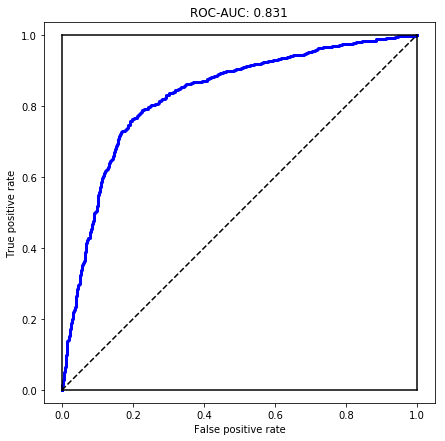

 Баллы: 100


In [241]:
log_reg = ft(train, target, test, vote["VC"], dropped_columns = [9, 15, 16, 17, 22, 26], cross_validation=False)
log_reg.roc_auc_plot()

In [12]:
log_reg.submit(name_file = 'sub_new_adaboost_2.csv')

done


In [148]:
from keras.models  import Sequential, K
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

n=24
model_1 = Sequential([
    Dense(1000, input_shape=(n,), activation="sigmoid"),
    BatchNormalization(),
    Dense(1, activation="sigmoid")
])

model_1.summary()

Using TensorFlow backend.
W0803 15:56:22.557038  8772 deprecation.py:506] From c:\users\shiro\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1624: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              25000     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1000)              4000      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1001      
Total params: 30,001
Trainable params: 28,001
Non-trainable params: 2,000
_________________________________________________________________


In [149]:
dropped_columns = [1, 9, 15, 16, 17, 22, 26]
X = train.drop(columns = dropped_columns)
X = StandardScaler().fit_transform(X)

# from sklearn.decomposition import PCA

# pca = PCA(n_components=n)
# X = pca.fit(X).transform(X)

y = target['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
model_1.compile(Adam(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)

W0803 15:56:23.096940  8772 deprecation.py:323] From c:\users\shiro\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0803 15:56:41.237029  8772 deprecation_wrapper.py:118] From c:\users\shiro\appdata\local\programs\python\python37\lib\site-packages\tensorflow_estimator\python\estimator\api\_v1\estimator\__init__.py:10: The name tf.estimator.inputs is deprecated. Please use tf.compat.v1.estimator.inputs instead.



ValueError: Error when checking input: expected dense_1_input to have shape (24,) but got array with shape (23,)

In [ ]:
y_pred_class_nn_1 = model_1.predict_classes(X_test)
y_pred_prob_nn_1 = model_1.predict(X_test)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))